# Libraries

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import string
import re
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import wordnet
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from gensim import corpora, models
from nltk.tokenize import word_tokenize
from collections import Counter
from gensim import corpora, models,similarities
import warnings
warnings.filterwarnings('ignore')
from itertools import combinations

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lucmi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Data set exploration

In [2]:
df_train = pd.read_csv("./dataset/medical_tc_train.csv")
df_test = pd.read_csv("./dataset/medical_tc_test.csv")
df_labels = pd.read_csv("./dataset/medical_tc_labels.csv")

In [3]:
df_train

condition_label                                   medical_abstract
0                    5  Tissue changes around loose prostheses. A cani...
1                    1  Neuropeptide Y and neuron-specific enolase lev...
2                    2  Sexually transmitted diseases of the colon, re...
3                    1  Lipolytic factors associated with murine and h...
4                    3  Does carotid restenosis predict an increased r...
...                ...                                                ...
11545                1  Epirubicin at two dose levels with prednisolon...
11546                1  Four and a half year follow up of women with d...
11547                5  Safety of the transbronchial biopsy in outpati...
11548                3  Interictal spikes and hippocampal somatostatin...
11549                5  Recurrent thoracic outlet syndrome after first...

[11550 rows x 2 columns]

In [4]:
df_train["condition_label"].value_counts()/df_train.shape[0]*100

5    33.281385
1    21.904762
4    21.134199
3    13.333333
2    10.346320
Name: condition_label, dtype: float64

In [5]:
df_train.isnull().values.any()

False

In [6]:
len_abstracts = []
for index, row in df_train.iterrows():
    len_abstracts.append(len(row.medical_abstract))

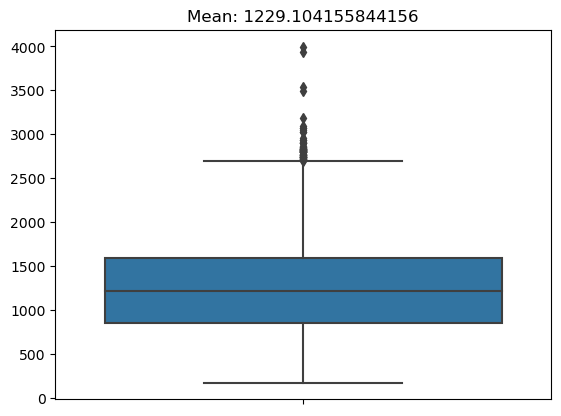

In [7]:
sns.boxplot( y=len_abstracts);
plt.title("Mean: " + str(np.mean(len_abstracts)))
plt.show()

In [8]:
df_test

condition_label                                   medical_abstract
0                   3  Obstructive sleep apnea following topical orop...
1                   5  Neutrophil function and pyogenic infections in...
2                   5  A phase II study of combined methotrexate and ...
3                   1  Flow cytometric DNA analysis of parathyroid tu...
4                   4  Paraneoplastic vasculitic neuropathy: a treata...
...               ...                                                ...
2883                4  Management of aortobronchial fistula with graf...
2884                5  Tuberculous psoas muscle abscess following che...
2885                4  Clinical evaluation of high-frequency (ultraso...
2886                1  Antitumor activity of liposome-encapsulated do...
2887                4  An unusual venous anomaly of the placenta. The...

[2888 rows x 2 columns]

In [9]:
df_test["condition_label"].value_counts()/df_test.shape[0]*100

5    33.275623
1    21.918283
4    21.121884
3    13.331025
2    10.353186
Name: condition_label, dtype: float64

In [10]:
pd.concat([df_test["condition_label"], df_train["condition_label"]]).value_counts()/(df_test.shape[0]+df_train.shape[0])*100

5    33.280233
1    21.907466
4    21.131736
3    13.332872
2    10.347694
Name: condition_label, dtype: float64

In [11]:
df_test.isnull().values.any()

False

In [12]:
len_abstracts = []
for index, row in df_test.iterrows():
    len_abstracts.append(len(row.medical_abstract))

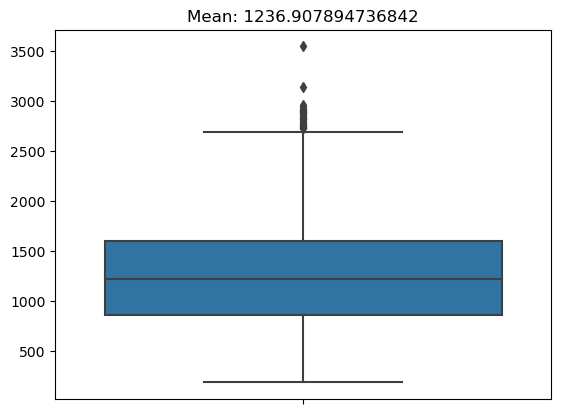

In [13]:
sns.boxplot( y=len_abstracts);
plt.title("Mean: " + str(np.mean(len_abstracts)))
plt.show()

In [14]:
df_labels

condition_label                   condition_name
0                1                        neoplasms
1                2        digestive system diseases
2                3          nervous system diseases
3                4          cardiovascular diseases
4                5  general pathological conditions

# Preprocessing 

In [15]:
df_train = pd.read_csv("./dataset/medical_tc_train.csv")
df_test = pd.read_csv("./dataset/medical_tc_test.csv")
df_labels = pd.read_csv("./dataset/medical_tc_labels.csv")

## Whitespaces

In [16]:
count_doubleNl = 0
count_tabs = 0
count_doubleTab = 0
count_tabNewline = 0
for index, row in df_train.iterrows():
    text = row.medical_abstract
    count_doubleNl += text.count('\n\n')
    count_tabs += text.count('\t')
    count_doubleTab += text.count('\t\t')
    count_tabNewline += text.count('\n\t')
print("Number of 2 newlines: ",count_doubleNl)
print("Number of tabs: ",count_tabs)
print("Number of 2 tabs: ",count_doubleTab)
print("Number of tab and newline: ",count_tabNewline)

Number of 2 newlines:  0
Number of tabs:  0
Number of 2 tabs:  0
Number of tab and newline:  0


In [17]:
count_doubleNl = 0
count_tabs = 0
count_doubleTab = 0
count_tabNewline = 0
for index, row in df_test.iterrows():
    text = row.medical_abstract
    count_doubleNl += text.count('\n\n')
    count_tabs += text.count('\t')
    count_doubleTab += text.count('\t\t')
    count_tabNewline += text.count('\n\t')
print("Number of 2 newlines: ",count_doubleNl)
print("Number of tabs: ",count_tabs)
print("Number of 2 tabs: ",count_doubleTab)
print("Number of tab and newline: ",count_tabNewline)

Number of 2 newlines:  0
Number of tabs:  0
Number of 2 tabs:  0
Number of tab and newline:  0


## Case folding

In [18]:
newAbs = []
for index, row in df_train.iterrows():
    text = row.medical_abstract
    newAbs.append(text.lower())
df_train.medical_abstract = newAbs

In [19]:
newAbs = []
for index, row in df_test.iterrows():
    text = row.medical_abstract
    newAbs.append(text.lower())
df_test.medical_abstract = newAbs

## Punctuation

In [20]:
list(string.punctuation)

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [21]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

df_train['medical_abstract'] = df_train['medical_abstract'].apply(lambda x: remove_punctuation(x))
df_test['medical_abstract'] = df_test['medical_abstract'].apply(lambda x: remove_punctuation(x))

In [22]:
df_train

condition_label                                   medical_abstract
0                    5  tissue changes around loose prostheses a canin...
1                    1  neuropeptide y and neuronspecific enolase leve...
2                    2  sexually transmitted diseases of the colon rec...
3                    1  lipolytic factors associated with murine and h...
4                    3  does carotid restenosis predict an increased r...
...                ...                                                ...
11545                1  epirubicin at two dose levels with prednisolon...
11546                1  four and a half year follow up of women with d...
11547                5  safety of the transbronchial biopsy in outpati...
11548                3  interictal spikes and hippocampal somatostatin...
11549                5  recurrent thoracic outlet syndrome after first...

[11550 rows x 2 columns]

In [23]:
df_test

condition_label                                   medical_abstract
0                   3  obstructive sleep apnea following topical orop...
1                   5  neutrophil function and pyogenic infections in...
2                   5  a phase ii study of combined methotrexate and ...
3                   1  flow cytometric dna analysis of parathyroid tu...
4                   4  paraneoplastic vasculitic neuropathy a treatab...
...               ...                                                ...
2883                4  management of aortobronchial fistula with graf...
2884                5  tuberculous psoas muscle abscess following che...
2885                4  clinical evaluation of highfrequency ultrasoni...
2886                1  antitumor activity of liposomeencapsulated dox...
2887                4  an unusual venous anomaly of the placenta the ...

[2888 rows x 2 columns]

## Numbers

In [24]:
cont_number = 0
for index, row in df_train.iterrows():
    text = row.medical_abstract
    cont_number += sum(c.isdigit() for c in text)
cont_number

230772

In [25]:
for index, row in df_train.iterrows():
    text = row.medical_abstract
    if(sum(c.isdigit() for c in text) > 0):
        print(text)

tissue changes around loose prostheses a canine model to investigate the effects of an antiinflammatory agent the aseptically loosened prosthesis provided a means for investigating the in vivo and in vitro activity of the cells associated with the loosening process in seven dogs the cells were isolated and maintained in culture for sufficient periods of time so that their biologic activity could be studied as well as the effect of different agents added to the cells in vivo or in vitro the biologic response as determined by interleukin1 and prostaglandin e2 activity paralleled the roentgenographic appearance of loosening and the technetium images and observations made at the time of revision surgery the correlation between clinical roentgenographic histologic and biochemical loosening indicates that the canine model is suitable for investigating the mechanisms of prosthetic failure a canine model permits the study of possible nonsurgical therapeutic interventions with the ultimate hope

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [26]:
cont_abs = 0
for index, row in df_train.iterrows():
    text = row.medical_abstract
    if(sum(c.isdigit() for c in text) > 0):
        cont_abs+= 1
cont_abs/df_train.shape[0]*100

82.45887445887445

In [27]:
df_train['medical_abstract']= df_train['medical_abstract'].apply(lambda x: re.sub(r'\d+', '', x))
df_test['medical_abstract']= df_test['medical_abstract'].apply(lambda x: re.sub(r'\d+', '', x))

In [28]:
number_words_pattern = r'\b(?:zero|one|two|three|four|five|six|seven|eight|nine|ten)\b'

In [29]:
df_train['medical_abstract']= df_train['medical_abstract'].apply(lambda x: re.sub(number_words_pattern, '', x, flags=re.IGNORECASE))
df_test['medical_abstract']= df_test['medical_abstract'].apply(lambda x: re.sub(number_words_pattern, '', x, flags=re.IGNORECASE))

## Remove links

In [30]:
def remove_links(text):
    remove_https = re.sub(r'http\S+', ' ', text)
    remove_com = re.sub(r"www\.[A-Za-z]*\.com", " ", remove_https)
    return remove_com

In [31]:
df_train['medical_abstract'] = df_train['medical_abstract'].apply(lambda x: remove_links(x))
df_test['medical_abstract'] = df_test['medical_abstract'].apply(lambda x: remove_links(x))

In [32]:
df_train

condition_label                                   medical_abstract
0                    5  tissue changes around loose prostheses a canin...
1                    1  neuropeptide y and neuronspecific enolase leve...
2                    2  sexually transmitted diseases of the colon rec...
3                    1  lipolytic factors associated with murine and h...
4                    3  does carotid restenosis predict an increased r...
...                ...                                                ...
11545                1  epirubicin at  dose levels with prednisolone a...
11546                1   and a half year follow up of women with dyska...
11547                5  safety of the transbronchial biopsy in outpati...
11548                3  interictal spikes and hippocampal somatostatin...
11549                5  recurrent thoracic outlet syndrome after first...

[11550 rows x 2 columns]

## Stop Words

In [33]:
cachedStopWords = stopwords.words("english")
cachedStopWords.extend(['month', 'one', 'leave', 'patient','study','group', 'child', 'case', 'b', 'show',
                        'disease','p','less','use','case','treatment','year','result','increase'])

In [34]:
def remSw(text):
    return ' '.join([word for word in text.split() if word not in cachedStopWords])


In [35]:
df_train['medical_abstract'] = df_train['medical_abstract'].apply(lambda x: remSw(x))
df_test['medical_abstract'] = df_test['medical_abstract'].apply(lambda x: remSw(x))

In [36]:
df_train

condition_label                                   medical_abstract
0                    5  tissue changes around loose prostheses canine ...
1                    1  neuropeptide neuronspecific enolase levels ben...
2                    2  sexually transmitted diseases colon rectum anu...
3                    1  lipolytic factors associated murine human canc...
4                    3  carotid restenosis predict increased risk late...
...                ...                                                ...
11545                1  epirubicin dose levels prednisolone advanced b...
11546                1  half follow women dyskaryotic cervical smears ...
11547                5  safety transbronchial biopsy outpatients objec...
11548                3  interictal spikes hippocampal somatostatin lev...
11549                5  recurrent thoracic outlet syndrome first rib r...

[11550 rows x 2 columns]

## Tokenization

In [37]:
def tokenize(text):
    return WordPunctTokenizer().tokenize(text)

In [38]:
df_train['medical_abstract_token'] = df_train['medical_abstract'].apply(lambda x: tokenize(x))
df_test['medical_abstract_token'] = df_test['medical_abstract'].apply(lambda x: tokenize(x))

In [39]:
df_train

condition_label                                   medical_abstract  \
0                    5  tissue changes around loose prostheses canine ...   
1                    1  neuropeptide neuronspecific enolase levels ben...   
2                    2  sexually transmitted diseases colon rectum anu...   
3                    1  lipolytic factors associated murine human canc...   
4                    3  carotid restenosis predict increased risk late...   
...                ...                                                ...   
11545                1  epirubicin dose levels prednisolone advanced b...   
11546                1  half follow women dyskaryotic cervical smears ...   
11547                5  safety transbronchial biopsy outpatients objec...   
11548                3  interictal spikes hippocampal somatostatin lev...   
11549                5  recurrent thoracic outlet syndrome first rib r...   

                                  medical_abstract_token  
0      [tissue, changes, around, loose, prostheses, c...  
1      [neuropeptide, neuronspecific, enolase, levels...  
2      [sexually, transmitted, diseases, colon, rectu...  
3      [lipolytic, factors, associated, murine, human...  
4      [carotid, restenosis, predict, increased, risk...  
...                                                  ...  
11545  [epirubicin, dose, levels, prednisolone, advan...  
11546  [half, follow, women, dyskaryotic, cervical, s...  
11547  [safety, transbronchial, biopsy, outpatients, ...  
11548  [interictal, spikes, hippocampal, somatostatin...  
11549  [recurrent, thoracic, outlet, syndrome, first,...  

[11550 rows x 3 columns]

## POS Tagging

In [40]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lucmi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [41]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\lucmi\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [42]:
def pos(tokens):
    return nltk.pos_tag(tokens, tagset='universal')

In [43]:
df_train['medical_abstract_pos'] = df_train['medical_abstract_token'].apply(lambda x: pos(x))
df_test['medical_abstract_pos'] = df_test['medical_abstract_token'].apply(lambda x: pos(x))

In [44]:
df_train

condition_label                                   medical_abstract  \
0                    5  tissue changes around loose prostheses canine ...   
1                    1  neuropeptide neuronspecific enolase levels ben...   
2                    2  sexually transmitted diseases colon rectum anu...   
3                    1  lipolytic factors associated murine human canc...   
4                    3  carotid restenosis predict increased risk late...   
...                ...                                                ...   
11545                1  epirubicin dose levels prednisolone advanced b...   
11546                1  half follow women dyskaryotic cervical smears ...   
11547                5  safety transbronchial biopsy outpatients objec...   
11548                3  interictal spikes hippocampal somatostatin lev...   
11549                5  recurrent thoracic outlet syndrome first rib r...   

                                  medical_abstract_token  \
0      [tissue, changes, around, loose, prostheses, c...   
1      [neuropeptide, neuronspecific, enolase, levels...   
2      [sexually, transmitted, diseases, colon, rectu...   
3      [lipolytic, factors, associated, murine, human...   
4      [carotid, restenosis, predict, increased, risk...   
...                                                  ...   
11545  [epirubicin, dose, levels, prednisolone, advan...   
11546  [half, follow, women, dyskaryotic, cervical, s...   
11547  [safety, transbronchial, biopsy, outpatients, ...   
11548  [interictal, spikes, hippocampal, somatostatin...   
11549  [recurrent, thoracic, outlet, syndrome, first,...   

                                    medical_abstract_pos  
0      [(tissue, NOUN), (changes, NOUN), (around, ADP...  
1      [(neuropeptide, ADV), (neuronspecific, ADJ), (...  
2      [(sexually, ADV), (transmitted, VERB), (diseas...  
3      [(lipolytic, ADJ), (factors, NOUN), (associate...  
4      [(carotid, NOUN), (restenosis, NOUN), (predict...  
...                                                  ...  
11545  [(epirubicin, NOUN), (dose, NOUN), (levels, NO...  
11546  [(half, NOUN), (follow, ADJ), (women, NOUN), (...  
11547  [(safety, NOUN), (transbronchial, ADJ), (biops...  
11548  [(interictal, ADJ), (spikes, NOUN), (hippocamp...  
11549  [(recurrent, NOUN), (thoracic, NOUN), (outlet,...  

[11550 rows x 4 columns]

## Lemmatization

In [45]:
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

def lemmatize_sentence(tagged_sentence):
    lemmatized_sentence = []
    for word, tag in tagged_sentence:
        if tag is None:
            lemmatized_sentence.append(word)
        else:
            if(get_wordnet_pos(tag) != ''):
                lemmatized_sentence.append(lemmatizer.lemmatize(word, get_wordnet_pos(tag)))
            else:
                lemmatized_sentence.append(word)
    return lemmatized_sentence

In [46]:
df_train['medical_abstract_lemma_token'] = df_train['medical_abstract_pos'].apply(lambda x: lemmatize_sentence(x))
df_test['medical_abstract_lemma_token'] = df_test['medical_abstract_pos'].apply(lambda x: lemmatize_sentence(x))

In [47]:
df_train

condition_label                                   medical_abstract  \
0                    5  tissue changes around loose prostheses canine ...   
1                    1  neuropeptide neuronspecific enolase levels ben...   
2                    2  sexually transmitted diseases colon rectum anu...   
3                    1  lipolytic factors associated murine human canc...   
4                    3  carotid restenosis predict increased risk late...   
...                ...                                                ...   
11545                1  epirubicin dose levels prednisolone advanced b...   
11546                1  half follow women dyskaryotic cervical smears ...   
11547                5  safety transbronchial biopsy outpatients objec...   
11548                3  interictal spikes hippocampal somatostatin lev...   
11549                5  recurrent thoracic outlet syndrome first rib r...   

                                  medical_abstract_token  \
0      [tissue, changes, around, loose, prostheses, c...   
1      [neuropeptide, neuronspecific, enolase, levels...   
2      [sexually, transmitted, diseases, colon, rectu...   
3      [lipolytic, factors, associated, murine, human...   
4      [carotid, restenosis, predict, increased, risk...   
...                                                  ...   
11545  [epirubicin, dose, levels, prednisolone, advan...   
11546  [half, follow, women, dyskaryotic, cervical, s...   
11547  [safety, transbronchial, biopsy, outpatients, ...   
11548  [interictal, spikes, hippocampal, somatostatin...   
11549  [recurrent, thoracic, outlet, syndrome, first,...   

                                    medical_abstract_pos  \
0      [(tissue, NOUN), (changes, NOUN), (around, ADP...   
1      [(neuropeptide, ADV), (neuronspecific, ADJ), (...   
2      [(sexually, ADV), (transmitted, VERB), (diseas...   
3      [(lipolytic, ADJ), (factors, NOUN), (associate...   
4      [(carotid, NOUN), (restenosis, NOUN), (predict...   
...                                                  ...   
11545  [(epirubicin, NOUN), (dose, NOUN), (levels, NO...   
11546  [(half, NOUN), (follow, ADJ), (women, NOUN), (...   
11547  [(safety, NOUN), (transbronchial, ADJ), (biops...   
11548  [(interictal, ADJ), (spikes, NOUN), (hippocamp...   
11549  [(recurrent, NOUN), (thoracic, NOUN), (outlet,...   

                            medical_abstract_lemma_token  
0      [tissue, change, around, loose, prosthesis, ca...  
1      [neuropeptide, neuronspecific, enolase, level,...  
2      [sexually, transmit, disease, colon, rectum, a...  
3      [lipolytic, factor, associate, murine, human, ...  
4      [carotid, restenosis, predict, increase, risk,...  
...                                                  ...  
11545  [epirubicin, dose, level, prednisolone, advanc...  
11546  [half, follow, woman, dyskaryotic, cervical, s...  
11547  [safety, transbronchial, biopsy, outpatient, o...  
11548  [interictal, spike, hippocampal, somatostatin,...  
11549  [recurrent, thoracic, outlet, syndrome, first,...  

[11550 rows x 5 columns]

## Merge processed tokens

In [48]:
def merge(tokens):
    return " ".join(tokens)

In [49]:
df_train['medical_abstract_lemma'] = df_train['medical_abstract_lemma_token'].apply(lambda x: merge(x))
df_test['medical_abstract_lemma'] = df_test['medical_abstract_lemma_token'].apply(lambda x: merge(x))

In [50]:
df_train

condition_label                                   medical_abstract  \
0                    5  tissue changes around loose prostheses canine ...   
1                    1  neuropeptide neuronspecific enolase levels ben...   
2                    2  sexually transmitted diseases colon rectum anu...   
3                    1  lipolytic factors associated murine human canc...   
4                    3  carotid restenosis predict increased risk late...   
...                ...                                                ...   
11545                1  epirubicin dose levels prednisolone advanced b...   
11546                1  half follow women dyskaryotic cervical smears ...   
11547                5  safety transbronchial biopsy outpatients objec...   
11548                3  interictal spikes hippocampal somatostatin lev...   
11549                5  recurrent thoracic outlet syndrome first rib r...   

                                  medical_abstract_token  \
0      [tissue, changes, around, loose, prostheses, c...   
1      [neuropeptide, neuronspecific, enolase, levels...   
2      [sexually, transmitted, diseases, colon, rectu...   
3      [lipolytic, factors, associated, murine, human...   
4      [carotid, restenosis, predict, increased, risk...   
...                                                  ...   
11545  [epirubicin, dose, levels, prednisolone, advan...   
11546  [half, follow, women, dyskaryotic, cervical, s...   
11547  [safety, transbronchial, biopsy, outpatients, ...   
11548  [interictal, spikes, hippocampal, somatostatin...   
11549  [recurrent, thoracic, outlet, syndrome, first,...   

                                    medical_abstract_pos  \
0      [(tissue, NOUN), (changes, NOUN), (around, ADP...   
1      [(neuropeptide, ADV), (neuronspecific, ADJ), (...   
2      [(sexually, ADV), (transmitted, VERB), (diseas...   
3      [(lipolytic, ADJ), (factors, NOUN), (associate...   
4      [(carotid, NOUN), (restenosis, NOUN), (predict...   
...                                                  ...   
11545  [(epirubicin, NOUN), (dose, NOUN), (levels, NO...   
11546  [(half, NOUN), (follow, ADJ), (women, NOUN), (...   
11547  [(safety, NOUN), (transbronchial, ADJ), (biops...   
11548  [(interictal, ADJ), (spikes, NOUN), (hippocamp...   
11549  [(recurrent, NOUN), (thoracic, NOUN), (outlet,...   

                            medical_abstract_lemma_token  \
0      [tissue, change, around, loose, prosthesis, ca...   
1      [neuropeptide, neuronspecific, enolase, level,...   
2      [sexually, transmit, disease, colon, rectum, a...   
3      [lipolytic, factor, associate, murine, human, ...   
4      [carotid, restenosis, predict, increase, risk,...   
...                                                  ...   
11545  [epirubicin, dose, level, prednisolone, advanc...   
11546  [half, follow, woman, dyskaryotic, cervical, s...   
11547  [safety, transbronchial, biopsy, outpatient, o...   
11548  [interictal, spike, hippocampal, somatostatin,...   
11549  [recurrent, thoracic, outlet, syndrome, first,...   

                                  medical_abstract_lemma  
0      tissue change around loose prosthesis canine m...  
1      neuropeptide neuronspecific enolase level beni...  
2      sexually transmit disease colon rectum anus ch...  
3      lipolytic factor associate murine human cancer...  
4      carotid restenosis predict increase risk late ...  
...                                                  ...  
11545  epirubicin dose level prednisolone advanced br...  
11546  half follow woman dyskaryotic cervical smear o...  
11547  safety transbronchial biopsy outpatient object...  
11548  interictal spike hippocampal somatostatin leve...  
11549  recurrent thoracic outlet syndrome first rib r...  

[11550 rows x 6 columns]

In [51]:
df_test

condition_label                                   medical_abstract  \
0                   3  obstructive sleep apnea following topical orop...   
1                   5  neutrophil function pyogenic infections bone m...   
2                   5  phase ii combined methotrexate teniposide infu...   
3                   1  flow cytometric dna analysis parathyroid tumor...   
4                   4  paraneoplastic vasculitic neuropathy treatable...   
...               ...                                                ...   
2883                4  management aortobronchial fistula graft replac...   
2884                5  tuberculous psoas muscle abscess following che...   
2885                4  clinical evaluation highfrequency ultrasonic m...   
2886                1  antitumor activity liposomeencapsulated doxoru...   
2887                4  unusual venous anomaly placenta authors presen...   

                                 medical_abstract_token  \
0     [obstructive, sleep, apnea, following, topical...   
1     [neutrophil, function, pyogenic, infections, b...   
2     [phase, ii, combined, methotrexate, teniposide...   
3     [flow, cytometric, dna, analysis, parathyroid,...   
4     [paraneoplastic, vasculitic, neuropathy, treat...   
...                                                 ...   
2883  [management, aortobronchial, fistula, graft, r...   
2884  [tuberculous, psoas, muscle, abscess, followin...   
2885  [clinical, evaluation, highfrequency, ultrason...   
2886  [antitumor, activity, liposomeencapsulated, do...   
2887  [unusual, venous, anomaly, placenta, authors, ...   

                                   medical_abstract_pos  \
0     [(obstructive, ADJ), (sleep, ADJ), (apnea, NOU...   
1     [(neutrophil, ADJ), (function, NOUN), (pyogeni...   
2     [(phase, NOUN), (ii, NOUN), (combined, VERB), ...   
3     [(flow, NOUN), (cytometric, NOUN), (dna, NOUN)...   
4     [(paraneoplastic, ADJ), (vasculitic, ADJ), (ne...   
...                                                 ...   
2883  [(management, NOUN), (aortobronchial, ADJ), (f...   
2884  [(tuberculous, ADJ), (psoas, NOUN), (muscle, N...   
2885  [(clinical, ADJ), (evaluation, NOUN), (highfre...   
2886  [(antitumor, NOUN), (activity, NOUN), (liposom...   
2887  [(unusual, ADJ), (venous, ADJ), (anomaly, NOUN...   

                           medical_abstract_lemma_token  \
0     [obstructive, sleep, apnea, follow, topical, o...   
1     [neutrophil, function, pyogenic, infection, bo...   
2     [phase, ii, combine, methotrexate, teniposide,...   
3     [flow, cytometric, dna, analysis, parathyroid,...   
4     [paraneoplastic, vasculitic, neuropathy, treat...   
...                                                 ...   
2883  [management, aortobronchial, fistula, graft, r...   
2884  [tuberculous, psoas, muscle, abscess, follow, ...   
2885  [clinical, evaluation, highfrequency, ultrason...   
2886  [antitumor, activity, liposomeencapsulated, do...   
2887  [unusual, venous, anomaly, placenta, author, p...   

                                 medical_abstract_lemma  
0     obstructive sleep apnea follow topical orophar...  
1     neutrophil function pyogenic infection bone ma...  
2     phase ii combine methotrexate teniposide infus...  
3     flow cytometric dna analysis parathyroid tumor...  
4     paraneoplastic vasculitic neuropathy treatable...  
...                                                 ...  
2883  management aortobronchial fistula graft replac...  
2884  tuberculous psoas muscle abscess follow chemop...  
2885  clinical evaluation highfrequency ultrasonic m...  
2886  antitumor activity liposomeencapsulated doxoru...  
2887  unusual venous anomaly placenta author present...  

[2888 rows x 6 columns]

## Save preprocessed dataframes

In [52]:
df_train.to_csv("./dataset/medical_tc_train_preprocessed.csv")
df_test.to_csv("./dataset/medical_tc_test_preprocessed.csv")

# Document representation

In [53]:
df_train = pd.read_csv("./dataset/medical_tc_train_preprocessed.csv", index_col = 0)
df_test = pd.read_csv("./dataset/medical_tc_test_preprocessed.csv", index_col = 0)

In [54]:
df_train

condition_label                                   medical_abstract  \
0                    5  tissue changes around loose prostheses canine ...   
1                    1  neuropeptide neuronspecific enolase levels ben...   
2                    2  sexually transmitted diseases colon rectum anu...   
3                    1  lipolytic factors associated murine human canc...   
4                    3  carotid restenosis predict increased risk late...   
...                ...                                                ...   
11545                1  epirubicin dose levels prednisolone advanced b...   
11546                1  half follow women dyskaryotic cervical smears ...   
11547                5  safety transbronchial biopsy outpatients objec...   
11548                3  interictal spikes hippocampal somatostatin lev...   
11549                5  recurrent thoracic outlet syndrome first rib r...   

                                  medical_abstract_token  \
0      ['tissue', 'changes', 'around', 'loose', 'pros...   
1      ['neuropeptide', 'neuronspecific', 'enolase', ...   
2      ['sexually', 'transmitted', 'diseases', 'colon...   
3      ['lipolytic', 'factors', 'associated', 'murine...   
4      ['carotid', 'restenosis', 'predict', 'increase...   
...                                                  ...   
11545  ['epirubicin', 'dose', 'levels', 'prednisolone...   
11546  ['half', 'follow', 'women', 'dyskaryotic', 'ce...   
11547  ['safety', 'transbronchial', 'biopsy', 'outpat...   
11548  ['interictal', 'spikes', 'hippocampal', 'somat...   
11549  ['recurrent', 'thoracic', 'outlet', 'syndrome'...   

                                    medical_abstract_pos  \
0      [('tissue', 'NOUN'), ('changes', 'NOUN'), ('ar...   
1      [('neuropeptide', 'ADV'), ('neuronspecific', '...   
2      [('sexually', 'ADV'), ('transmitted', 'VERB'),...   
3      [('lipolytic', 'ADJ'), ('factors', 'NOUN'), ('...   
4      [('carotid', 'NOUN'), ('restenosis', 'NOUN'), ...   
...                                                  ...   
11545  [('epirubicin', 'NOUN'), ('dose', 'NOUN'), ('l...   
11546  [('half', 'NOUN'), ('follow', 'ADJ'), ('women'...   
11547  [('safety', 'NOUN'), ('transbronchial', 'ADJ')...   
11548  [('interictal', 'ADJ'), ('spikes', 'NOUN'), ('...   
11549  [('recurrent', 'NOUN'), ('thoracic', 'NOUN'), ...   

                            medical_abstract_lemma_token  \
0      ['tissue', 'change', 'around', 'loose', 'prost...   
1      ['neuropeptide', 'neuronspecific', 'enolase', ...   
2      ['sexually', 'transmit', 'disease', 'colon', '...   
3      ['lipolytic', 'factor', 'associate', 'murine',...   
4      ['carotid', 'restenosis', 'predict', 'increase...   
...                                                  ...   
11545  ['epirubicin', 'dose', 'level', 'prednisolone'...   
11546  ['half', 'follow', 'woman', 'dyskaryotic', 'ce...   
11547  ['safety', 'transbronchial', 'biopsy', 'outpat...   
11548  ['interictal', 'spike', 'hippocampal', 'somato...   
11549  ['recurrent', 'thoracic', 'outlet', 'syndrome'...   

                                  medical_abstract_lemma  
0      tissue change around loose prosthesis canine m...  
1      neuropeptide neuronspecific enolase level beni...  
2      sexually transmit disease colon rectum anus ch...  
3      lipolytic factor associate murine human cancer...  
4      carotid restenosis predict increase risk late ...  
...                                                  ...  
11545  epirubicin dose level prednisolone advanced br...  
11546  half follow woman dyskaryotic cervical smear o...  
11547  safety transbronchial biopsy outpatient object...  
11548  interictal spike hippocampal somatostatin leve...  
11549  recurrent thoracic outlet syndrome first rib r...  

[11550 rows x 6 columns]

In [55]:
df_test

condition_label                                   medical_abstract  \
0                   3  obstructive sleep apnea following topical orop...   
1                   5  neutrophil function pyogenic infections bone m...   
2                   5  phase ii combined methotrexate teniposide infu...   
3                   1  flow cytometric dna analysis parathyroid tumor...   
4                   4  paraneoplastic vasculitic neuropathy treatable...   
...               ...                                                ...   
2883                4  management aortobronchial fistula graft replac...   
2884                5  tuberculous psoas muscle abscess following che...   
2885                4  clinical evaluation highfrequency ultrasonic m...   
2886                1  antitumor activity liposomeencapsulated doxoru...   
2887                4  unusual venous anomaly placenta authors presen...   

                                 medical_abstract_token  \
0     ['obstructive', 'sleep', 'apnea', 'following',...   
1     ['neutrophil', 'function', 'pyogenic', 'infect...   
2     ['phase', 'ii', 'combined', 'methotrexate', 't...   
3     ['flow', 'cytometric', 'dna', 'analysis', 'par...   
4     ['paraneoplastic', 'vasculitic', 'neuropathy',...   
...                                                 ...   
2883  ['management', 'aortobronchial', 'fistula', 'g...   
2884  ['tuberculous', 'psoas', 'muscle', 'abscess', ...   
2885  ['clinical', 'evaluation', 'highfrequency', 'u...   
2886  ['antitumor', 'activity', 'liposomeencapsulate...   
2887  ['unusual', 'venous', 'anomaly', 'placenta', '...   

                                   medical_abstract_pos  \
0     [('obstructive', 'ADJ'), ('sleep', 'ADJ'), ('a...   
1     [('neutrophil', 'ADJ'), ('function', 'NOUN'), ...   
2     [('phase', 'NOUN'), ('ii', 'NOUN'), ('combined...   
3     [('flow', 'NOUN'), ('cytometric', 'NOUN'), ('d...   
4     [('paraneoplastic', 'ADJ'), ('vasculitic', 'AD...   
...                                                 ...   
2883  [('management', 'NOUN'), ('aortobronchial', 'A...   
2884  [('tuberculous', 'ADJ'), ('psoas', 'NOUN'), ('...   
2885  [('clinical', 'ADJ'), ('evaluation', 'NOUN'), ...   
2886  [('antitumor', 'NOUN'), ('activity', 'NOUN'), ...   
2887  [('unusual', 'ADJ'), ('venous', 'ADJ'), ('anom...   

                           medical_abstract_lemma_token  \
0     ['obstructive', 'sleep', 'apnea', 'follow', 't...   
1     ['neutrophil', 'function', 'pyogenic', 'infect...   
2     ['phase', 'ii', 'combine', 'methotrexate', 'te...   
3     ['flow', 'cytometric', 'dna', 'analysis', 'par...   
4     ['paraneoplastic', 'vasculitic', 'neuropathy',...   
...                                                 ...   
2883  ['management', 'aortobronchial', 'fistula', 'g...   
2884  ['tuberculous', 'psoas', 'muscle', 'abscess', ...   
2885  ['clinical', 'evaluation', 'highfrequency', 'u...   
2886  ['antitumor', 'activity', 'liposomeencapsulate...   
2887  ['unusual', 'venous', 'anomaly', 'placenta', '...   

                                 medical_abstract_lemma  
0     obstructive sleep apnea follow topical orophar...  
1     neutrophil function pyogenic infection bone ma...  
2     phase ii combine methotrexate teniposide infus...  
3     flow cytometric dna analysis parathyroid tumor...  
4     paraneoplastic vasculitic neuropathy treatable...  
...                                                 ...  
2883  management aortobronchial fistula graft replac...  
2884  tuberculous psoas muscle abscess follow chemop...  
2885  clinical evaluation highfrequency ultrasonic m...  
2886  antitumor activity liposomeencapsulated doxoru...  
2887  unusual venous anomaly placenta author present...  

[2888 rows x 6 columns]

## Word2Vec NEW

In [56]:
abstracts = pd.concat([df_train, df_test])

In [57]:
from gensim.models import Word2Vec
sentences = [sentence.split() for sentence in abstracts['medical_abstract_lemma']]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

In [58]:
import numpy as np
def vectorize(sentence): 
  words = sentence.split() 
  words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv] 
  if len(words_vecs) == 0: 
    return np.zeros(300) 
  words_vecs = np.array(words_vecs) 
  return words_vecs.mean(axis=0)

df_train_vectorized = np.array([vectorize(sentence) for sentence in df_train['medical_abstract_lemma']])
df_test_vectorized = np.array([vectorize(sentence) for sentence in df_test['medical_abstract_lemma']])

In [59]:
df_train_vectorized

array([[-0.53248173,  0.20111369, -0.05642616, ..., -0.70869964,
         0.17994207,  0.14327392],
       [-0.44860685,  0.19118537,  0.2978219 , ...,  0.29268166,
         0.1271124 ,  0.00634772],
       [-0.14881396,  0.27577618,  0.45065448, ...,  0.05028571,
        -0.12709859, -0.21764225],
       ...,
       [ 0.13556787, -0.15003303,  0.6520193 , ..., -0.2251183 ,
        -0.16991046, -0.05654285],
       [-0.39463922,  0.2630786 , -0.1713797 , ..., -0.18574601,
        -0.06122187,  0.11227041],
       [-0.15763122, -0.35531908,  0.30500704, ..., -0.21893285,
        -0.51031226, -0.04801056]], dtype=float32)

In [60]:
df_train_vectorized.shape

(11550, 100)

In [61]:
df_test_vectorized.shape

(2888, 100)

### Save vectorized dataframes

In [62]:
pd.DataFrame(df_train_vectorized).to_csv("./dataset/medical_tc_train_vectorized_w2vec.csv")
pd.DataFrame(df_test_vectorized).to_csv("./dataset/medical_tc_test_vectorized_w2vec.csv")

## Word2Vec OLD

In [63]:
from gensim.models import Word2Vec
sentences = [sentence.split() for sentence in df_train['medical_abstract_lemma']] 
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

In [64]:
import numpy as np
def vectorize(sentence): 
  words = sentence.split() 
  words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv] 
  if len(words_vecs) == 0: 
    return np.zeros(100) 
  words_vecs = np.array(words_vecs) 
  return words_vecs.mean(axis=0)

df_train_vectorized = np.array([vectorize(sentence) for sentence in df_train['medical_abstract_lemma']])
df_test_vectorized = np.array([vectorize(sentence) for sentence in df_test['medical_abstract_lemma']])

In [65]:
df_train_vectorized

array([[-0.4539274 ,  0.33372137, -0.09268522, ..., -0.5912409 ,
         0.21237169,  0.03137194],
       [ 0.11663619,  0.03915917, -0.08047085, ..., -0.34138358,
         0.09468367,  0.11407002],
       [ 0.18135008,  0.074536  , -0.06864931, ..., -0.51071995,
         0.239077  , -0.12443034],
       ...,
       [ 0.02545462,  0.35122305,  0.17074893, ..., -0.29950643,
         0.08300583, -0.14653783],
       [-0.12520449,  0.10442537,  0.07804589, ..., -0.5069742 ,
         0.2026647 , -0.0283951 ],
       [ 0.14961891,  0.3157314 ,  0.11175612, ..., -0.20772097,
        -0.03838452, -0.31603304]], dtype=float32)

In [66]:
df_train_vectorized.shape

(11550, 100)

In [67]:
df_test_vectorized.shape

(2888, 100)

### Save vectorized dataframes

In [68]:
pd.DataFrame(df_train_vectorized).to_csv("./dataset/medical_tc_train_vectorized_w2vec.csv")
pd.DataFrame(df_test_vectorized).to_csv("./dataset/medical_tc_test_vectorized_w2vec.csv")

## SBERT

In [63]:
from sentence_transformers import SentenceTransformer

# Load the SBERT model (you can choose different pre-trained models)
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Example sentences
sentences = abstracts['medical_abstract_lemma'].tolist()

# Generate embeddings for the sentences
sentence_embeddings = model.encode(sentences)

# Display the embeddings
#for sentence, embedding in zip(sentences, sentence_embeddings):
    #print(f"Sentence: {sentence}")
    #print(f"Embedding shape: {embedding.shape}")
    #print(f"Embedding: {embedding}")
    #print()


In [64]:
sentence_embeddings.shape

(14438, 384)

In [65]:
df = pd.DataFrame(data=sentence_embeddings[0:11550,:])
csv_filename = "./dataset/medical_tc_train_vectorized_sbert.csv"
df.to_csv(csv_filename) 

In [66]:
df = pd.DataFrame(data=sentence_embeddings[11550:,:])
csv_filename = "./dataset/medical_tc_test_vectorized_sbert.csv"
df.to_csv(csv_filename) 

# Classification

In [ ]:
df_train_vectorized = pd.read_csv("./dataset/medical_tc_train_vectorized.csv", index_col = 0)
df_test_vectorized = pd.read_csv("./dataset/medical_tc_test_vectorized.csv", index_col = 0)

In [ ]:
df_train_vectorized.shape

In [ ]:
df_train_vectorized

# Topic modeling

In [79]:
df_train = pd.read_csv("./dataset/medical_tc_train_preprocessed.csv", index_col = 0)
df_test = pd.read_csv("./dataset/medical_tc_test_preprocessed.csv", index_col = 0)

In [80]:
df_total = pd.concat([df_train, df_test], ignore_index = True)

In [81]:
df_total

condition_label                                   medical_abstract  \
0                    5  tissue changes around loose prostheses canine ...   
1                    1  neuropeptide neuronspecific enolase levels ben...   
2                    2  sexually transmitted diseases colon rectum anu...   
3                    1  lipolytic factors associated murine human canc...   
4                    3  carotid restenosis predict increased risk late...   
...                ...                                                ...   
14433                4  management aortobronchial fistula graft replac...   
14434                5  tuberculous psoas muscle abscess following che...   
14435                4  clinical evaluation highfrequency ultrasonic m...   
14436                1  antitumor activity liposomeencapsulated doxoru...   
14437                4  unusual venous anomaly placenta authors presen...   

                                  medical_abstract_token  \
0      ['tissue', 'changes', 'around', 'loose', 'pros...   
1      ['neuropeptide', 'neuronspecific', 'enolase', ...   
2      ['sexually', 'transmitted', 'diseases', 'colon...   
3      ['lipolytic', 'factors', 'associated', 'murine...   
4      ['carotid', 'restenosis', 'predict', 'increase...   
...                                                  ...   
14433  ['management', 'aortobronchial', 'fistula', 'g...   
14434  ['tuberculous', 'psoas', 'muscle', 'abscess', ...   
14435  ['clinical', 'evaluation', 'highfrequency', 'u...   
14436  ['antitumor', 'activity', 'liposomeencapsulate...   
14437  ['unusual', 'venous', 'anomaly', 'placenta', '...   

                                    medical_abstract_pos  \
0      [('tissue', 'NOUN'), ('changes', 'NOUN'), ('ar...   
1      [('neuropeptide', 'ADV'), ('neuronspecific', '...   
2      [('sexually', 'ADV'), ('transmitted', 'VERB'),...   
3      [('lipolytic', 'ADJ'), ('factors', 'NOUN'), ('...   
4      [('carotid', 'NOUN'), ('restenosis', 'NOUN'), ...   
...                                                  ...   
14433  [('management', 'NOUN'), ('aortobronchial', 'A...   
14434  [('tuberculous', 'ADJ'), ('psoas', 'NOUN'), ('...   
14435  [('clinical', 'ADJ'), ('evaluation', 'NOUN'), ...   
14436  [('antitumor', 'NOUN'), ('activity', 'NOUN'), ...   
14437  [('unusual', 'ADJ'), ('venous', 'ADJ'), ('anom...   

                            medical_abstract_lemma_token  \
0      ['tissue', 'change', 'around', 'loose', 'prost...   
1      ['neuropeptide', 'neuronspecific', 'enolase', ...   
2      ['sexually', 'transmit', 'disease', 'colon', '...   
3      ['lipolytic', 'factor', 'associate', 'murine',...   
4      ['carotid', 'restenosis', 'predict', 'increase...   
...                                                  ...   
14433  ['management', 'aortobronchial', 'fistula', 'g...   
14434  ['tuberculous', 'psoas', 'muscle', 'abscess', ...   
14435  ['clinical', 'evaluation', 'highfrequency', 'u...   
14436  ['antitumor', 'activity', 'liposomeencapsulate...   
14437  ['unusual', 'venous', 'anomaly', 'placenta', '...   

                                  medical_abstract_lemma  
0      tissue change around loose prosthesis canine m...  
1      neuropeptide neuronspecific enolase level beni...  
2      sexually transmit disease colon rectum anus ch...  
3      lipolytic factor associate murine human cancer...  
4      carotid restenosis predict increase risk late ...  
...                                                  ...  
14433  management aortobronchial fistula graft replac...  
14434  tuberculous psoas muscle abscess follow chemop...  
14435  clinical evaluation highfrequency ultrasonic m...  
14436  antitumor activity liposomeencapsulated doxoru...  
14437  unusual venous anomaly placenta author present...  

[14438 rows x 6 columns]

In [82]:
label_train = df_train.condition_label.values
label_test = df_test.condition_label.values

In [83]:
labels = np.append(label_train, label_test)

In [84]:
# Create a DataFrame
df = pd.DataFrame(df_total['medical_abstract_lemma'])

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    return tokens

# Apply text preprocessing to the DataFrame
df['processed_text'] = df_total['medical_abstract_lemma'].apply(preprocess_text)

# Create dictionary and corpus
dictionary = corpora.Dictionary(df['processed_text'])
#dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in df['processed_text']]

## LSA

In [85]:
# Run LSA (Latent Semantic Analysis)
num_topics = 5 # Define the number of topics
lsa_model = models.LsiModel(corpus, num_topics=num_topics, id2word=dictionary)

# Display topics and associated words
for topic_id in range(num_topics):
    print(f"Topic {topic_id + 1}:")
    print(lsa_model.show_topic(topic_id))

Topic 1:
[('patient', 0.8238421709918745), ('cell', 0.08377280992063109), ('year', 0.0817593661136083), ('tumor', 0.07774785762196035), ('rate', 0.0767568173852675), ('result', 0.07434412296890117), ('mean', 0.07129775995064042), ('coronary', 0.06745761175857541), ('therapy', 0.06699604719262922), ('clinical', 0.06656119458171006)]
Topic 2:
[('cell', -0.641855945008291), ('patient', 0.368787222051115), ('tumor', -0.23235460621936693), ('human', -0.13120042067473497), ('blood', -0.12252345989510068), ('effect', -0.1063617970463833), ('rat', -0.09921651945184025), ('normal', -0.0938508994433282), ('carcinoma', -0.09271080735616959), ('level', -0.09226104005598842)]
Topic 3:
[('cell', 0.3668400639339324), ('pressure', -0.26842631153960594), ('patient', 0.2654451977915778), ('blood', -0.243202053729397), ('tumor', 0.23262087570300052), ('coronary', -0.22995535495759858), ('artery', -0.19064338126848687), ('ventricular', -0.16629518285686276), ('heart', -0.14866870330335716), ('leave', -0.1

In [86]:
# Evaluate coherence score
from gensim.models import CoherenceModel
coherence_model = CoherenceModel(model=lsa_model, texts=df['processed_text'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {coherence_score}")

Coherence Score: 0.4513460462863564


In [87]:
doc_topic_matrix = lsa_model[corpus]
assignedTopics = []
for assigned_topics in list(doc_topic_matrix):
    maxP = -1
    maxT = -1
    for topic, probability in assigned_topics:
        if(probability>maxP):
            maxP = probability
            maxT = topic
    assignedTopics.append(maxT)
    

In [90]:
# % of real labels in each topic
for topic in [0,1,2,3,4]:
    print("******* TOPIC " + str(topic))
    indices = [index for index, value in enumerate(assignedTopics) if value == topic]
    real_labels = [labels[i] for i in indices]
    # Get the frequency of elements using Counter
    frequency = Counter(real_labels)

    # Calculate relative frequencies
    total_elements = len(real_labels)
    relative_frequency = {key: value / total_elements for key, value in frequency.items()}

    print(relative_frequency)

******* TOPIC 0
{5: 0.3432874354561102, 1: 0.17616179001721172, 2: 0.11265060240963855, 3: 0.14225473321858864, 4: 0.22564543889845096}
******* TOPIC 1
{}
******* TOPIC 2
{1: 0.6678571428571428, 5: 0.24642857142857144, 3: 0.0375, 4: 0.010714285714285714, 2: 0.0375}
******* TOPIC 3
{5: 0.31620553359683795, 4: 0.09881422924901186, 3: 0.12648221343873517, 1: 0.33794466403162055, 2: 0.12055335968379446}
******* TOPIC 4
{1: 0.32102728731942215, 4: 0.2592295345104334, 3: 0.09871589085072231, 5: 0.28731942215088285, 2: 0.033707865168539325}


In [91]:
# % of real labels in each topic
for label in [1,2,3,4,5]:
    print("******* LABEL " + str(label))
    indices = [index for index, value in enumerate(labels) if value == label]
    assigned_topics = [assignedTopics[i] for i in indices]
    # Get the frequency of elements using Counter
    frequency = Counter(assigned_topics)

    # Calculate relative frequencies
    total_elements = len(assigned_topics)
    relative_frequency = {key: value / total_elements for key, value in frequency.items()}

    print(relative_frequency)

******* LABEL 1
{0: 0.6471704078406576, 4: 0.12646221941195068, 2: 0.11824217515017389, 3: 0.10812519759721784}
******* LABEL 2
{0: 0.8761713520749665, 3: 0.08165997322623829, 4: 0.028112449799196786, 2: 0.014056224899598393}
******* LABEL 3
{0: 0.8587012987012987, 4: 0.0638961038961039, 3: 0.0664935064935065, 2: 0.01090909090909091}
******* LABEL 4
{0: 0.8593903638151426, 4: 0.10586692887577843, 3: 0.03277613897082924, 2: 0.0019665683382497543}
******* LABEL 5
{0: 0.8301768990634756, 3: 0.06659729448491156, 4: 0.0745057232049948, 2: 0.028720083246618105}


In [92]:
df_labels

condition_label                   condition_name
0                1                        neoplasms
1                2        digestive system diseases
2                3          nervous system diseases
3                4          cardiovascular diseases
4                5  general pathological conditions

## pLSA

In [95]:
# Create a DataFrame
df = pd.DataFrame(df_total['medical_abstract_lemma'])


# Apply text preprocessing to the DataFrame
df['processed_text'] = df_total['medical_abstract_lemma'].apply(preprocess_text)

# Create dictionary and corpus
dictionary = corpora.Dictionary(df['processed_text'])
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in df['processed_text']]

# Run pLSA (Latent Semantic Analysis)
num_topics = 5 # Define the number of topics
plsa_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15, alpha='auto', eta='auto')

# Display topics and associated words
for topic_id in range(num_topics):
    print(f"Topic {topic_id + 1}:")
    print(plsa_model.show_topic(topic_id))

Topic 1:
[('surgery', 0.008003932), ('complication', 0.007904779), ('surgical', 0.007406354), ('use', 0.0066325967), ('procedure', 0.0061061843), ('pain', 0.006087646), ('result', 0.0059009907), ('postoperative', 0.0053696036), ('perform', 0.0051043318), ('rate', 0.0049049337)]
Topic 2:
[('age', 0.009978349), ('risk', 0.009645614), ('year', 0.008867049), ('therapy', 0.008374881), ('cancer', 0.007129666), ('child', 0.007019452), ('clinical', 0.0061005712), ('woman', 0.0059739915), ('rate', 0.0056828675), ('factor', 0.0055399626)]
Topic 3:
[('cell', 0.026441833), ('tumor', 0.0204908), ('carcinoma', 0.010864796), ('human', 0.0073120375), ('cancer', 0.006182095), ('antibody', 0.0054467754), ('case', 0.0053373245), ('dna', 0.004762295), ('tissue', 0.004721237), ('normal', 0.004682869)]
Topic 4:
[('artery', 0.014417854), ('coronary', 0.010832099), ('ventricular', 0.008419169), ('aortic', 0.0077513196), ('leave', 0.006874554), ('lesion', 0.0064374227), ('valve', 0.0056956653), ('image', 0.005

In [96]:
# Evaluate coherence score
coherence_model = CoherenceModel(model=plsa_model, texts=df['processed_text'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {coherence_score}")

Coherence Score: 0.5047987124145595


In [99]:
# Get the topics' term distributions
topics = [plsa_model.get_topic_terms(topic_id) for topic_id in range(num_topics)]

# Calculate diversity (cosine similarity)
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    similarity = dot_product / (norm_vec1 * norm_vec2)
    return similarity

topic_combinations = combinations(topics, 2)
diversity_scores = []

for pair in topic_combinations:
    term_ids1, term_scores1 = zip(*pair[0])
    term_ids2, term_scores2 = zip(*pair[1])

    # Convert topic term distributions to vectors
    vec1 = np.zeros(len(dictionary))
    vec2 = np.zeros(len(dictionary))

    for idx, score in zip(term_ids1, term_scores1):
        vec1[idx] = score

    for idx, score in zip(term_ids2, term_scores2):
        vec2[idx] = score

    # Calculate cosine similarity
    similarity_score = cosine_similarity(vec1, vec2)
    diversity_scores.append(similarity_score)

average_diversity = sum(diversity_scores) / len(diversity_scores)
print(f"Average Topic Diversity (Cosine Similarity): {average_diversity}")

Average Topic Diversity (Cosine Similarity): 0.010515594247681587


In [102]:
def format_topics_sentences(texts, plsa_model=None, corpus=corpus):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(plsa_model[corpus]):
        row = row_list[0] if plsa_model.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = plsa_model.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(df['processed_text'], plsa_model=plsa_model, corpus=corpus)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               4              0.4105   
1            1               2              0.7140   
2            2               1              0.6503   
3            3               2              0.8023   
4            4               3              0.6324   
5            5               3              0.5314   
6            6               0              0.7968   
7            7               0              0.9944   
8            8               3              0.9949   
9            9               3              0.8187   

                                            Keywords  \
0  effect, blood, pressure, control, increase, le...   
1  cell, tumor, carcinoma, human, cancer, antibod...   
2  age, risk, year, therapy, cancer, child, clini...   
3  cell, tumor, carcinoma, human, cancer, antibod...   
4  artery, coronary, ventricular, aortic, leave, ...   
5  artery, coronary, ventricular, aortic, leave, ...   
6  surgery, complication, surgical, use, procedur...   
7  surgery, complication, surgical, use, procedur...   
8  artery, coronary, ventricular, aortic, leave, ...   
9  artery, coronary, ventricular, aortic, leave, ...   

                                                Text  
0  [tissue, change, around, loose, prosthesis, ca...  
1  [neuropeptide, neuronspecific, enolase, level,...  
2  [sexually, transmit, disease, colon, rectum, a...  
3  [lipolytic, factor, associate, murine, human, ...  
4  [carotid, restenosis, predict, increase, risk,...  
5  [shoulder, multiple, epiphyseal, dysplasia, hu...  
6  [management, postoperative, chylous, ascites, ...  
7  [pharmacomechanical, thrombolysis, angioplasty...  
8  [color, doppler, diagnosis, mechanical, prosth...  
9  [noninvasive, diagnosis, rightsided, extracard...

In [103]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

Topic_Num  Topic_Perc_Contrib  \
0          0              0.9964   
1          1              0.9971   
2          2              0.9973   
3          3              0.9962   
4          4              0.9976   

                                                                                      Keywords  \
0  surgery, complication, surgical, use, procedure, pain, result, postoperative, perform, rate   
1                       age, risk, year, therapy, cancer, child, clinical, woman, rate, factor   
2                   cell, tumor, carcinoma, human, cancer, antibody, case, dna, tissue, normal   
3      artery, coronary, ventricular, aortic, leave, lesion, valve, image, cardiac, infarction   
4  effect, blood, pressure, control, increase, level, rat, heart, significantly, concentration   

                                                                                   Representative Text  
0  [efficacy, palliative, definitive, percutaneous, versus, surgical, drainage, pancreatic, abscess...  
1  [qualityoflifeadjusted, evaluation, adjuvant, therapy, operable, breast, cancer, international, ...  
2  [transformationassociated, alteration, interaction, preb, cell, fibronectin, marrow, stromal, el...  
3  [coronary, pathology, predict, conduction, disturbance, coronary, artery, bypass, graft, conduct...  
4  [study, control, reperfusion, ischemia, xxi, reperfusate, composition, superiority, blood, cardi...

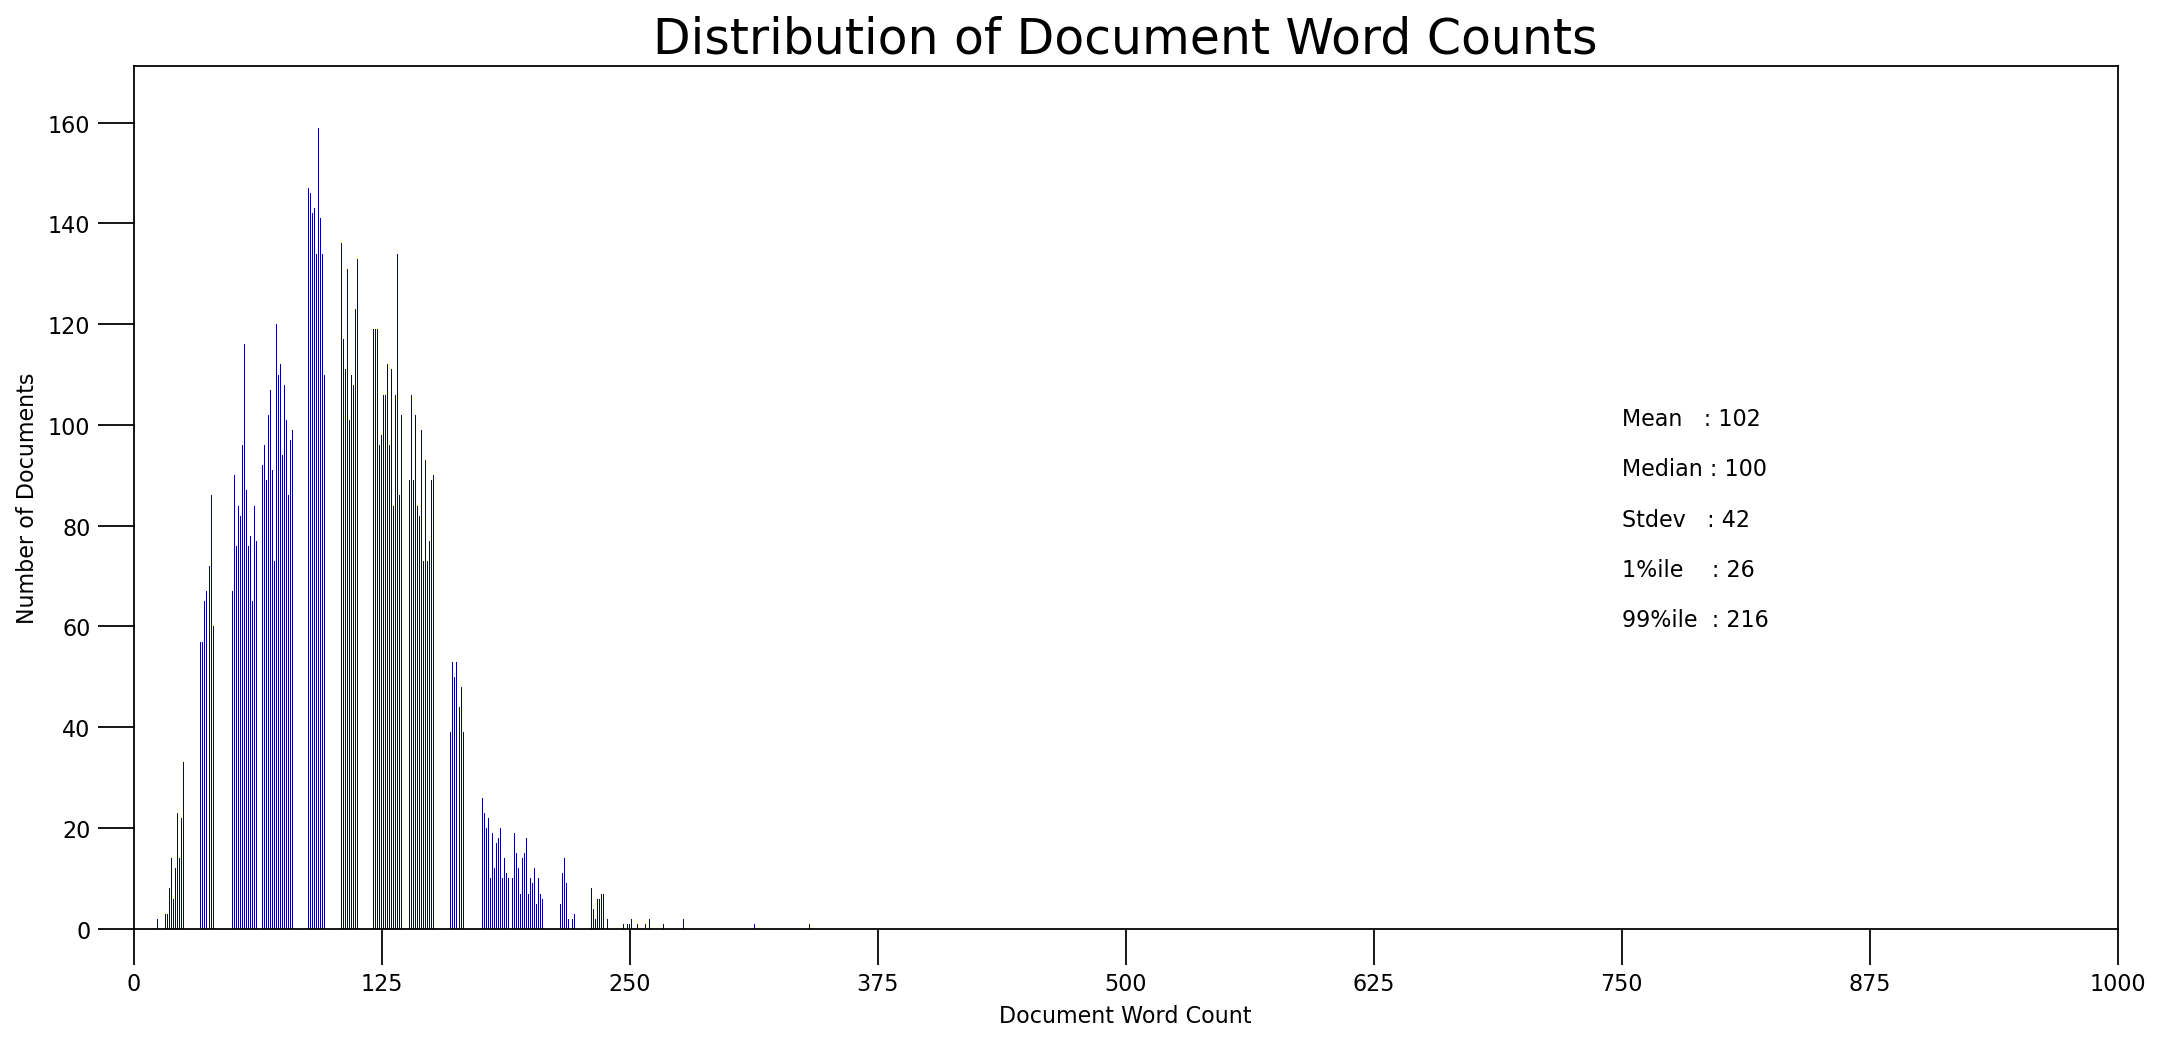

In [104]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

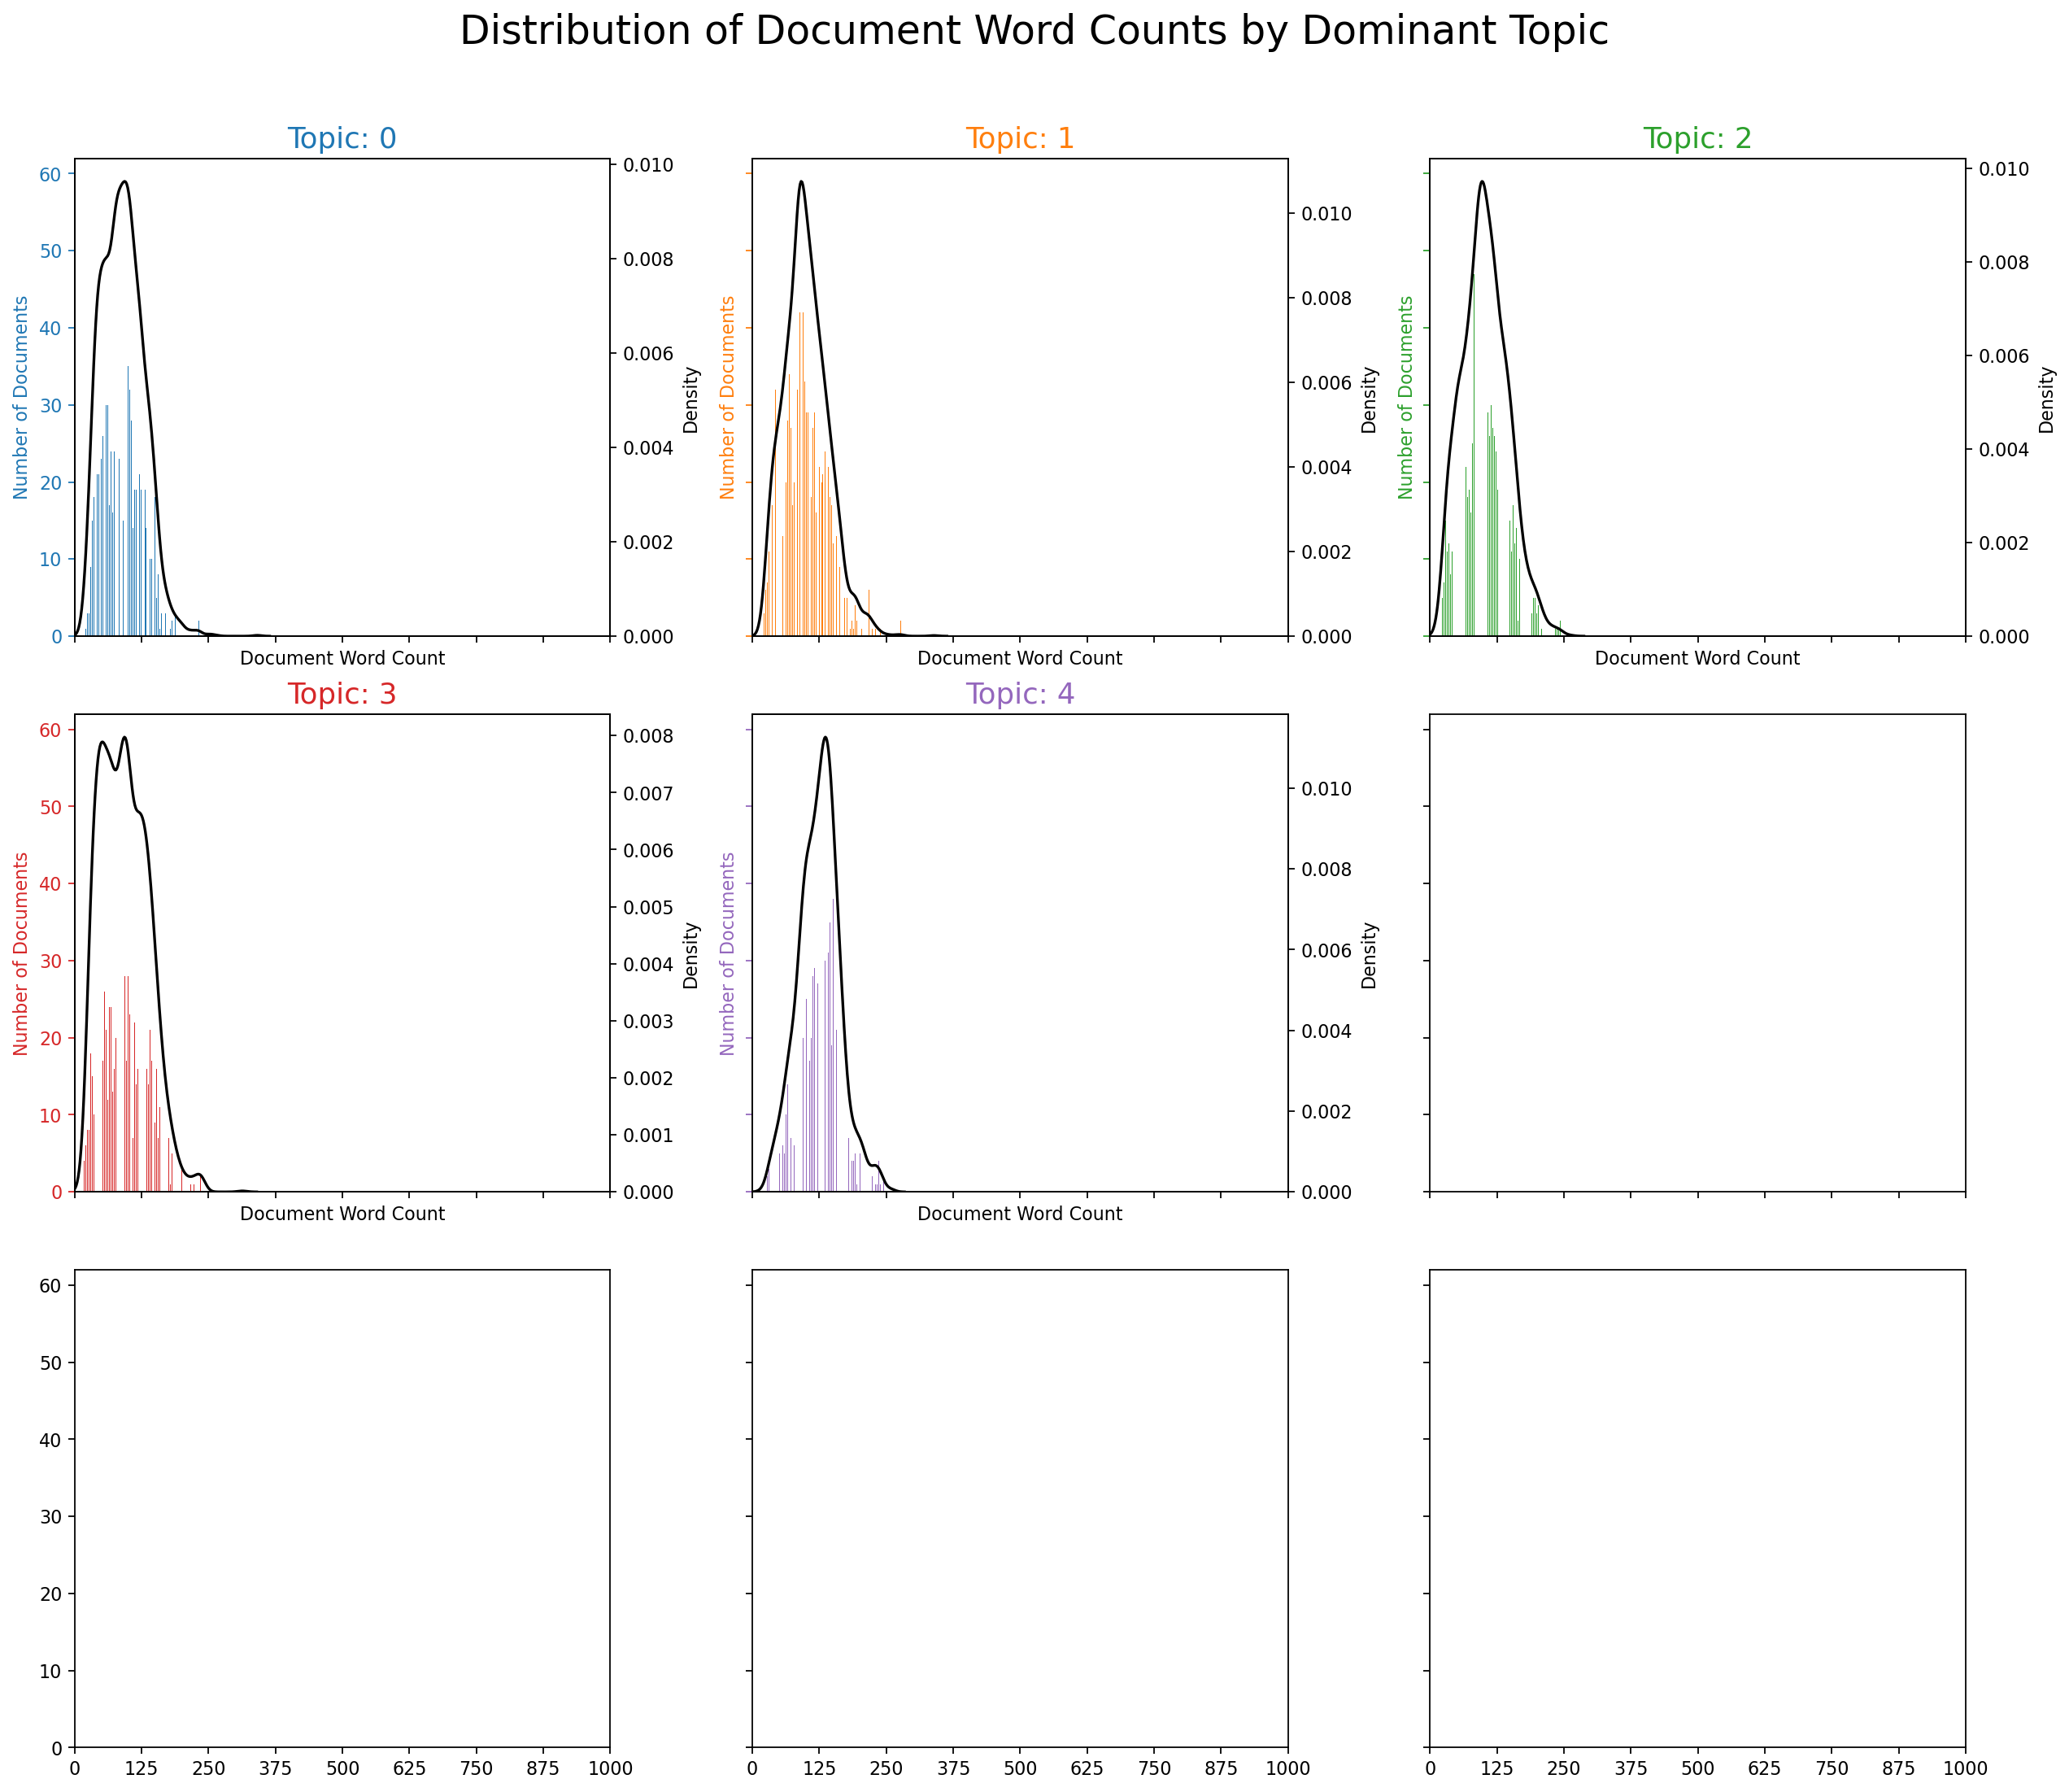

In [105]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(3,3,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    if(i <=4):
        df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
        doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
        ax.hist(doc_lens, bins = 1000, color=cols[i])
        ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
        sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
        ax.set(xlim=(0, 1000), xlabel='Document Word Count')
        ax.set_ylabel('Number of Documents', color=cols[i])
        ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

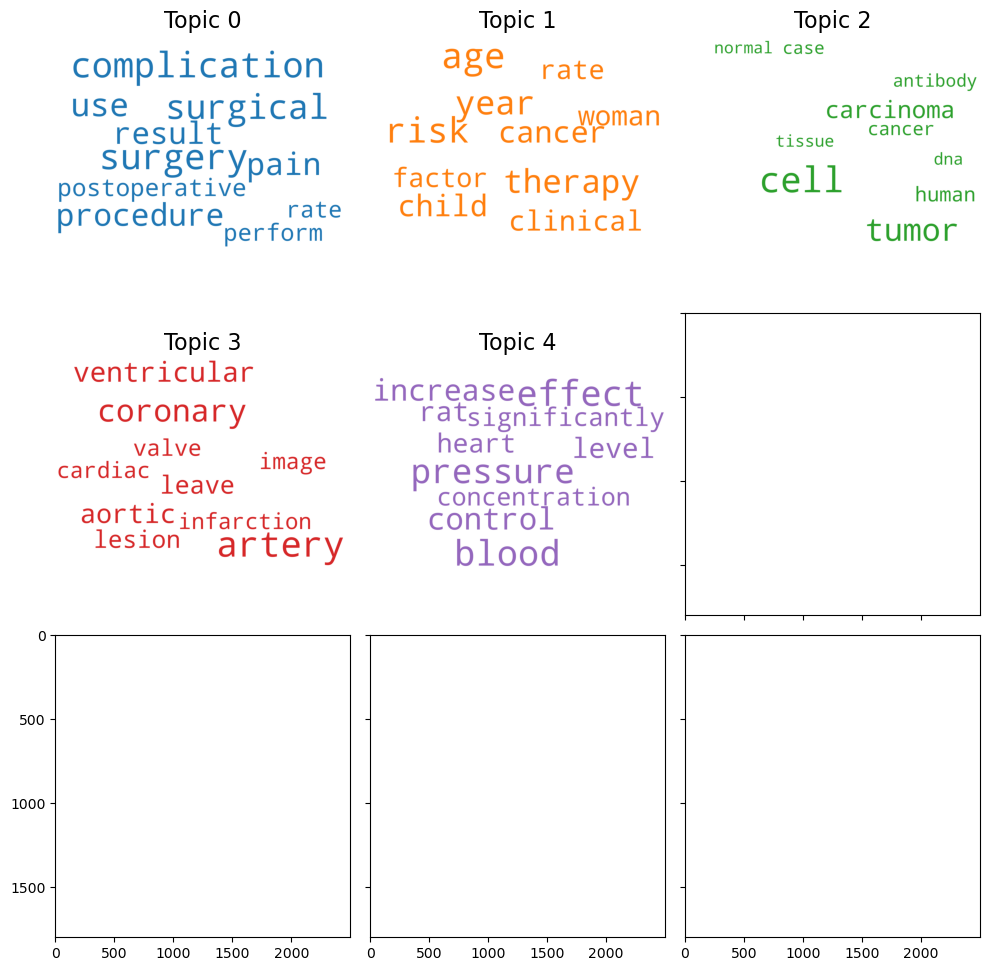

In [107]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = plsa_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    if(i<=4):
        fig.add_subplot(ax)
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
        plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

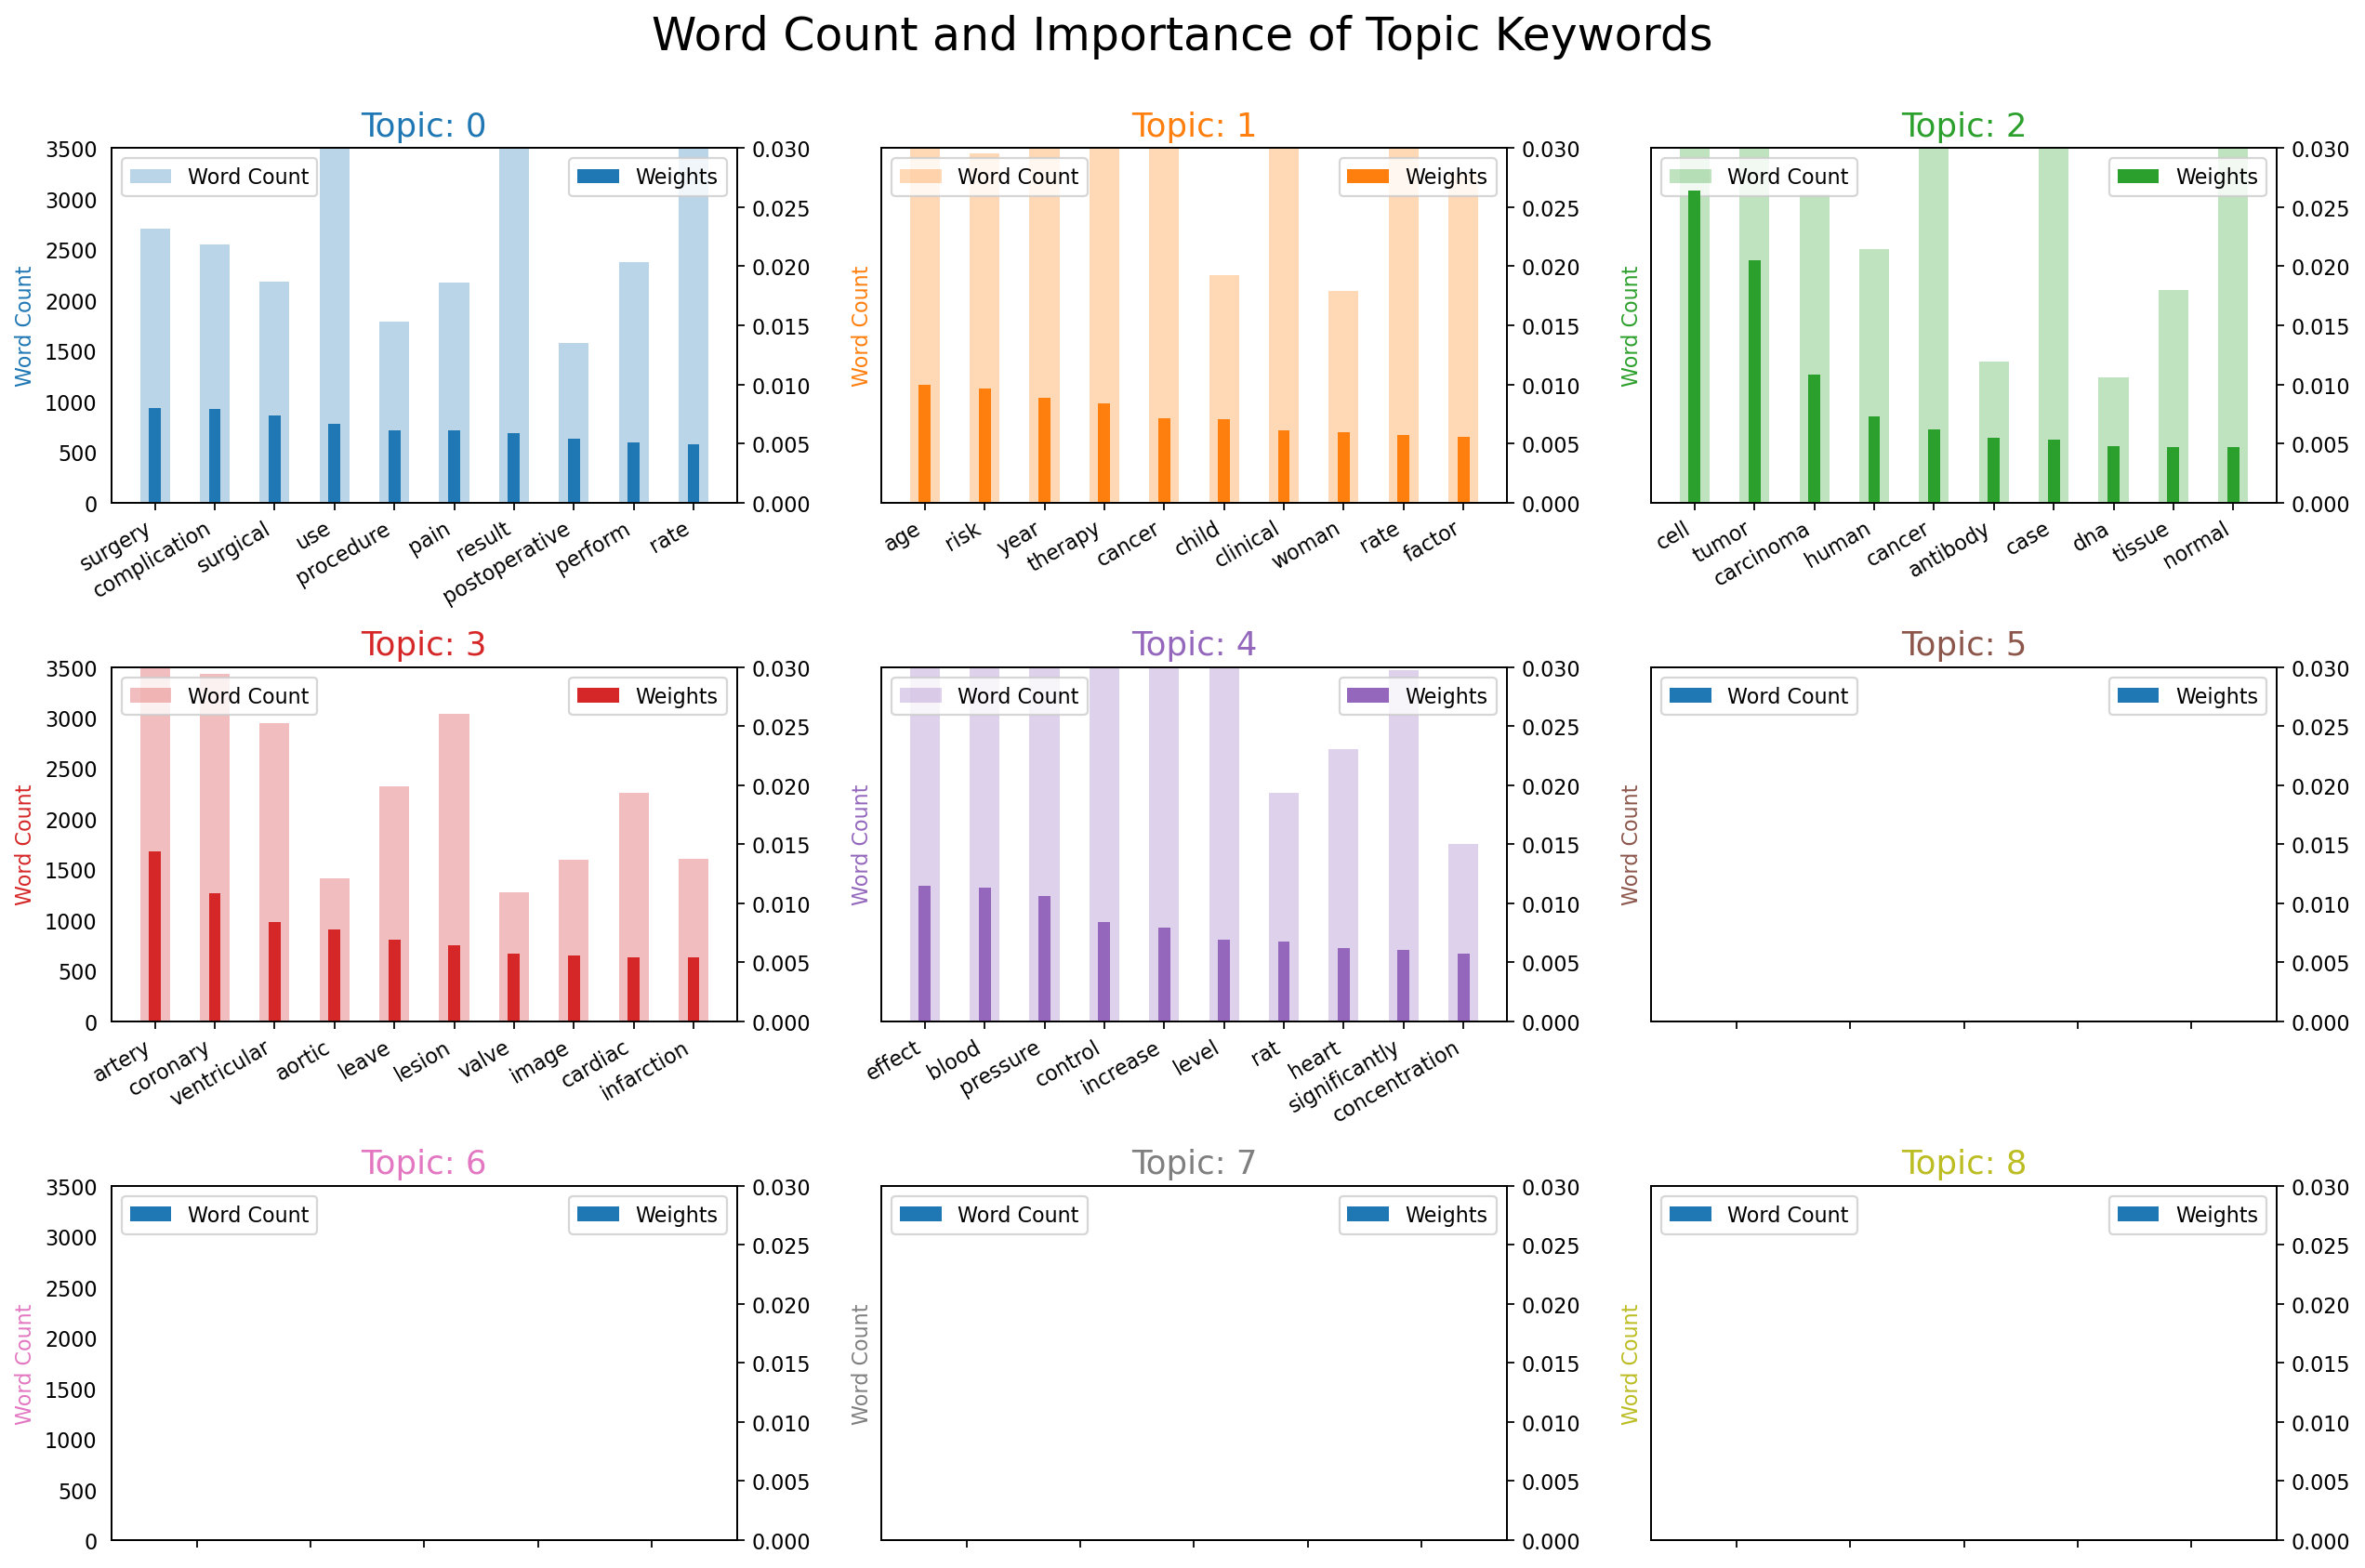

In [108]:
from collections import Counter
topics = plsa_model.show_topics(formatted=False)
data_flat = [w for w_list in df['processed_text'] for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

dff = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 3, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=dff.loc[dff.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=dff.loc[dff.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(dff.loc[dff.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [109]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

topic_weights = []
for doc_topics in plsa_model.get_document_topics(corpus):
    topic_weights.append([weight for topic_id, weight in doc_topics])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 14219 samples in 0.008s...
[t-SNE] Computed neighbors for 14219 samples in 0.208s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14219
[t-SNE] Computed conditional probabilities for sample 2000 / 14219
[t-SNE] Computed conditional probabilities for sample 3000 / 14219
[t-SNE] Computed conditional probabilities for sample 4000 / 14219
[t-SNE] Computed conditional probabilities for sample 5000 / 14219
[t-SNE] Computed conditional probabilities for sample 6000 / 14219
[t-SNE] Computed conditional probabilities for sample 7000 / 14219
[t-SNE] Computed conditional probabilities for sample 8000 / 14219
[t-SNE] Computed conditional probabilities for sample 9000 / 14219
[t-SNE] Computed conditional probabilities for sample 10000 / 14219
[t-SNE] Computed conditional probabilities for sample 11000 / 14219
[t-SNE] Computed conditional probabilities for sample 12000 / 14219
[t-SNE] Computed conditional probabilities for sam

In [110]:
# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 5
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} pLSA Topics".format(n_topics))
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

Loading BokehJS ...

In [111]:
assignedTopics = []
for document in corpus:
    assigned_topics = plsa_model.get_document_topics(document)
    maxP = -1
    maxT = -1
    for topic, probability in assigned_topics:
        if(probability>maxP):
            maxP = probability
            maxT = topic
    assignedTopics.append(maxT)
    

In [112]:
# % of real labels in each topic
for topic in [0,1,2,3,4]:
    print("******* TOPIC " + str(topic))
    indices = [index for index, value in enumerate(assignedTopics) if value == topic]
    real_labels = [labels[i] for i in indices]
    # Get the frequency of elements using Counter
    frequency = Counter(real_labels)

    # Calculate relative frequencies
    total_elements = len(real_labels)
    relative_frequency = {key: value / total_elements for key, value in frequency.items()}

    print(relative_frequency)

******* TOPIC 0
{2: 0.17226027397260274, 4: 0.15102739726027398, 1: 0.14794520547945206, 5: 0.42363013698630136, 3: 0.10513698630136986}
******* TOPIC 1
{2: 0.12960098979276213, 4: 0.14630374265388185, 3: 0.15248994741725952, 5: 0.3390040210330962, 1: 0.23260129910300031}
******* TOPIC 2
{1: 0.5293148880105402, 5: 0.27733860342555994, 4: 0.027009222661396576, 3: 0.06455862977602109, 2: 0.10177865612648221}
******* TOPIC 3
{3: 0.2340909090909091, 5: 0.32272727272727275, 1: 0.08787878787878788, 4: 0.3443181818181818, 2: 0.010984848484848484}
******* TOPIC 4
{5: 0.298198543503258, 4: 0.43924875431199695, 2: 0.08968953622077425, 3: 0.11920275967803756, 1: 0.053660406285933306}


In [113]:
# % of real labels in each topic
for label in [1,2,3,4,5]:
    print("******* LABEL " + str(label))
    indices = [index for index, value in enumerate(labels) if value == label]
    assigned_topics = [assignedTopics[i] for i in indices]
    # Get the frequency of elements using Counter
    frequency = Counter(assigned_topics)

    # Calculate relative frequencies
    total_elements = len(assigned_topics)
    relative_frequency = {key: value / total_elements for key, value in frequency.items()}

    print(relative_frequency)

******* LABEL 1
{2: 0.5080619664875119, 0: 0.13657919696490672, 3: 0.0733480872589314, 4: 0.044261776794182736, 1: 0.23774897249446728}
******* LABEL 2
{1: 0.28045515394912984, 0: 0.33668005354752345, 4: 0.1566265060240964, 2: 0.20682730923694778, 3: 0.019410977242302542}
******* LABEL 3
{3: 0.321038961038961, 4: 0.16155844155844157, 1: 0.2561038961038961, 2: 0.10181818181818182, 0: 0.15948051948051947}
******* LABEL 4
{0: 0.14454277286135694, 4: 0.37561455260570303, 1: 0.15503113733202228, 3: 0.29793510324483774, 2: 0.026876433956079974}
******* LABEL 5
{4: 0.1619146722164412, 3: 0.177315296566077, 0: 0.2574401664932362, 2: 0.1752341311134235, 1: 0.22809573361082205}


In [114]:
df_labels

condition_label                   condition_name
0                1                        neoplasms
1                2        digestive system diseases
2                3          nervous system diseases
3                4          cardiovascular diseases
4                5  general pathological conditions

## LDA

In [115]:
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Display topics and associated words
for topic_id in range(num_topics):
    print(f"Topic {topic_id + 1}:")
    print(lda_model.show_topic(topic_id))

Topic 1:
[('cell', 0.027787028), ('tumor', 0.021656292), ('carcinoma', 0.01148281), ('cancer', 0.009445944), ('human', 0.0074127447), ('antibody', 0.0057564876), ('tissue', 0.005072812), ('dna', 0.0050331554), ('primary', 0.0049679033), ('liver', 0.004915946)]
Topic 2:
[('blood', 0.013251638), ('effect', 0.010480736), ('pressure', 0.010207785), ('control', 0.009737748), ('level', 0.008886076), ('increase', 0.008357744), ('rat', 0.0075262384), ('plasma', 0.0065106982), ('concentration', 0.0061794226), ('hypertension', 0.00603111)]
Topic 3:
[('report', 0.007409919), ('case', 0.007382777), ('age', 0.0069796396), ('risk', 0.006928173), ('syndrome', 0.006286217), ('year', 0.006257653), ('clinical', 0.00619383), ('diagnosis', 0.005340793), ('woman', 0.0052542486), ('may', 0.0051894463)]
Topic 4:
[('artery', 0.0136049045), ('coronary', 0.011625566), ('ventricular', 0.009848089), ('leave', 0.0076809004), ('myocardial', 0.007207183), ('cardiac', 0.006975862), ('aortic', 0.0064265947), ('infarct

In [116]:
# Evaluate coherence score
coherence_model = CoherenceModel(model=lda_model, texts=df['processed_text'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {coherence_score}")

Coherence Score: 0.5319928361116306


In [117]:
# Get the topics' term distributions
topics = [lda_model.get_topic_terms(topic_id) for topic_id in range(num_topics)]

# Calculate diversity (cosine similarity)
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    similarity = dot_product / (norm_vec1 * norm_vec2)
    return similarity

topic_combinations = combinations(topics, 2)
diversity_scores = []

for pair in topic_combinations:
    term_ids1, term_scores1 = zip(*pair[0])
    term_ids2, term_scores2 = zip(*pair[1])

    # Convert topic term distributions to vectors
    vec1 = np.zeros(len(dictionary))
    vec2 = np.zeros(len(dictionary))

    for idx, score in zip(term_ids1, term_scores1):
        vec1[idx] = score

    for idx, score in zip(term_ids2, term_scores2):
        vec2[idx] = score

    # Calculate cosine similarity
    similarity_score = cosine_similarity(vec1, vec2)
    diversity_scores.append(similarity_score)

average_diversity = sum(diversity_scores) / len(diversity_scores)
print(f"Average Topic Diversity (Cosine Similarity): {average_diversity}")

Average Topic Diversity (Cosine Similarity): 0.008854875695911606


In [120]:
def format_topics_sentences(texts, ldamodel=None, corpus=corpus):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(df['processed_text'], ldamodel=lda_model, corpus=corpus)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               1              0.3269   
1            1               0              0.6736   
2            2               2              0.8922   
3            3               0              0.7164   
4            4               3              0.7371   
5            5               2              0.9092   
6            6               2              0.5242   
7            7               3              0.8926   
8            8               3              0.9932   
9            9               3              0.7708   

                                                                                      Keywords  \
0  blood, effect, pressure, control, level, increase, rat, plasma, concentration, hypertension   
1                 cell, tumor, carcinoma, cancer, human, antibody, tissue, dna, primary, liver   
2                     report, case, age, risk, syndrome, year, clinical, diagnosis, woman, may   
3                 cell, tumor, carcinoma, cancer, human, antibody, tissue, dna, primary, liver   
4   artery, coronary, ventricular, leave, myocardial, cardiac, aortic, infarction, mean, graft   
5                     report, case, age, risk, syndrome, year, clinical, diagnosis, woman, may   
6                     report, case, age, risk, syndrome, year, clinical, diagnosis, woman, may   
7   artery, coronary, ventricular, leave, myocardial, cardiac, aortic, infarction, mean, graft   
8   artery, coronary, ventricular, leave, myocardial, cardiac, aortic, infarction, mean, graft   
9   artery, coronary, ventricular, leave, myocardial, cardiac, aortic, infarction, mean, graft   

                                                                                                  Text  
0  [tissue, change, around, loose, prosthesis, canine, model, investigate, effect, antiinflammatory...  
1  [neuropeptide, neuronspecific, enolase, level, benign, malignant, pheochromocytoma, neuronspecif...  
2  [sexually, transmit, disease, colon, rectum, anus, challenge, ninety, past, decade, explosive, g...  
3  [lipolytic, factor, associate, murine, human, cancer, cachexia, identify, lipolytic, factor, ext...  
4  [carotid, restenosis, predict, increase, risk, late, symptom, stroke, death, identification, car...  
5  [shoulder, multiple, epiphyseal, dysplasia, hundred, shoulder, assess, patient, multiple, epiphy...  
6  [management, postoperative, chylous, ascites, report, literature, review, chylous, ascites, rema...  
7  [pharmacomechanical, thrombolysis, angioplasty, management, clot, hemodialysis, graft, early, la...  
8  [color, doppler, diagnosis, mechanical, prosthetic, mitral, regurgitation, usefulness, flow, con...  
9  [noninvasive, diagnosis, rightsided, extracardiac, conduit, obstruction, combine, magnetic, reso...

In [121]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

Topic_Num  Topic_Perc_Contrib  \
0          0              0.9964   
1          1              0.9961   
2          2              0.9953   
3          3              0.9962   
4          4              0.9954   

                                                                                      Keywords  \
0                 cell, tumor, carcinoma, cancer, human, antibody, tissue, dna, primary, liver   
1  blood, effect, pressure, control, level, increase, rat, plasma, concentration, hypertension   
2                     report, case, age, risk, syndrome, year, clinical, diagnosis, woman, may   
3   artery, coronary, ventricular, leave, myocardial, cardiac, aortic, infarction, mean, graft   
4                   therapy, receive, day, month, survival, treat, per, effect, response, rate   

                                                                                   Representative Text  
0  [transformationassociated, alteration, interaction, preb, cell, fibronectin, marrow, stromal, el...  
1  [increase, sympathetic, outflow, cirrhosis, ascites, direct, evidence, intraneural, recording, o...  
2  [sexual, physical, abuse, woman, functional, organic, gastrointestinal, disorder, objectives, de...  
3  [hypoplastic, transverse, arch, coarctation, neonates, surgical, reconstruction, aortic, arch, s...  
4  [ondansetron, compare, highdose, metoclopramide, prophylaxis, acute, delayed, cisplatininduced, ...

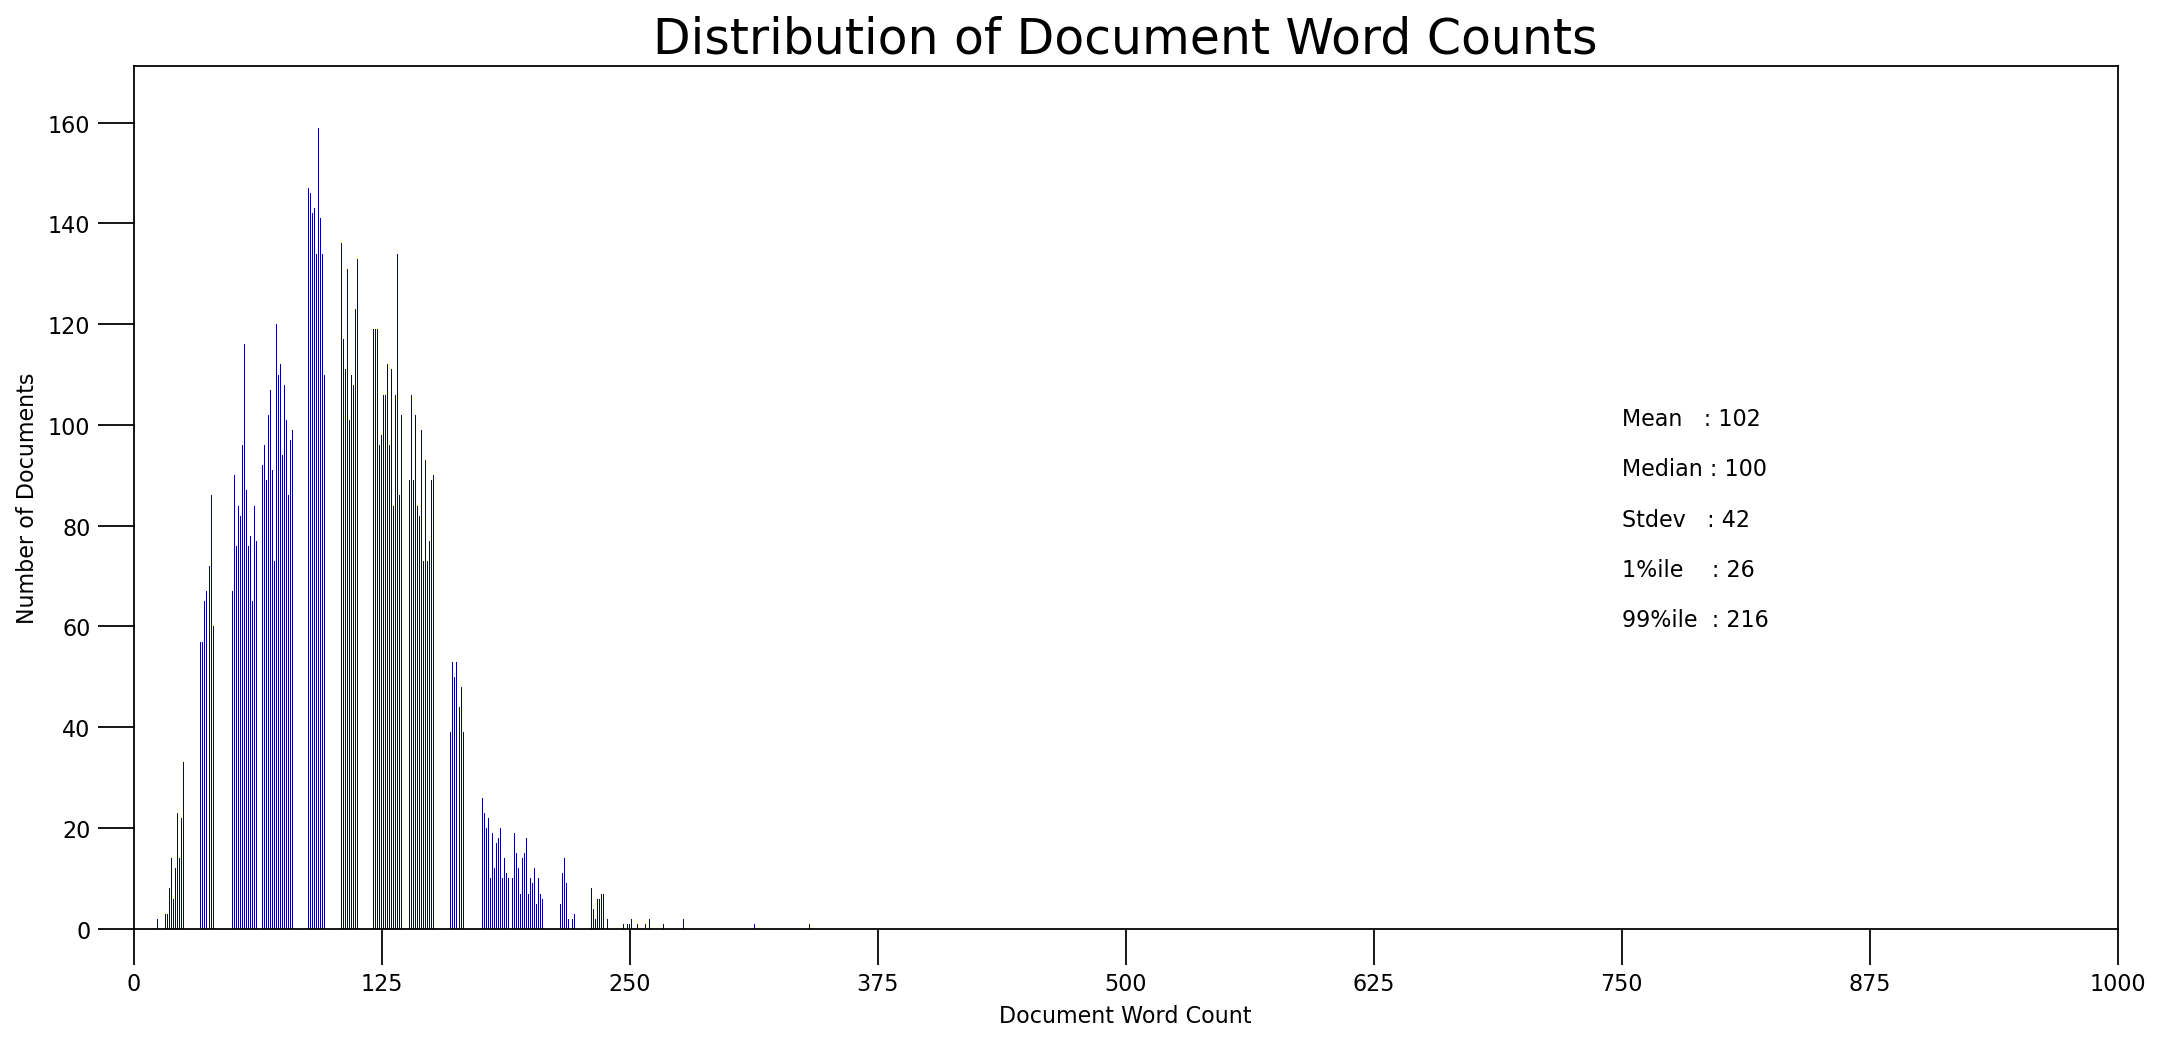

In [122]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

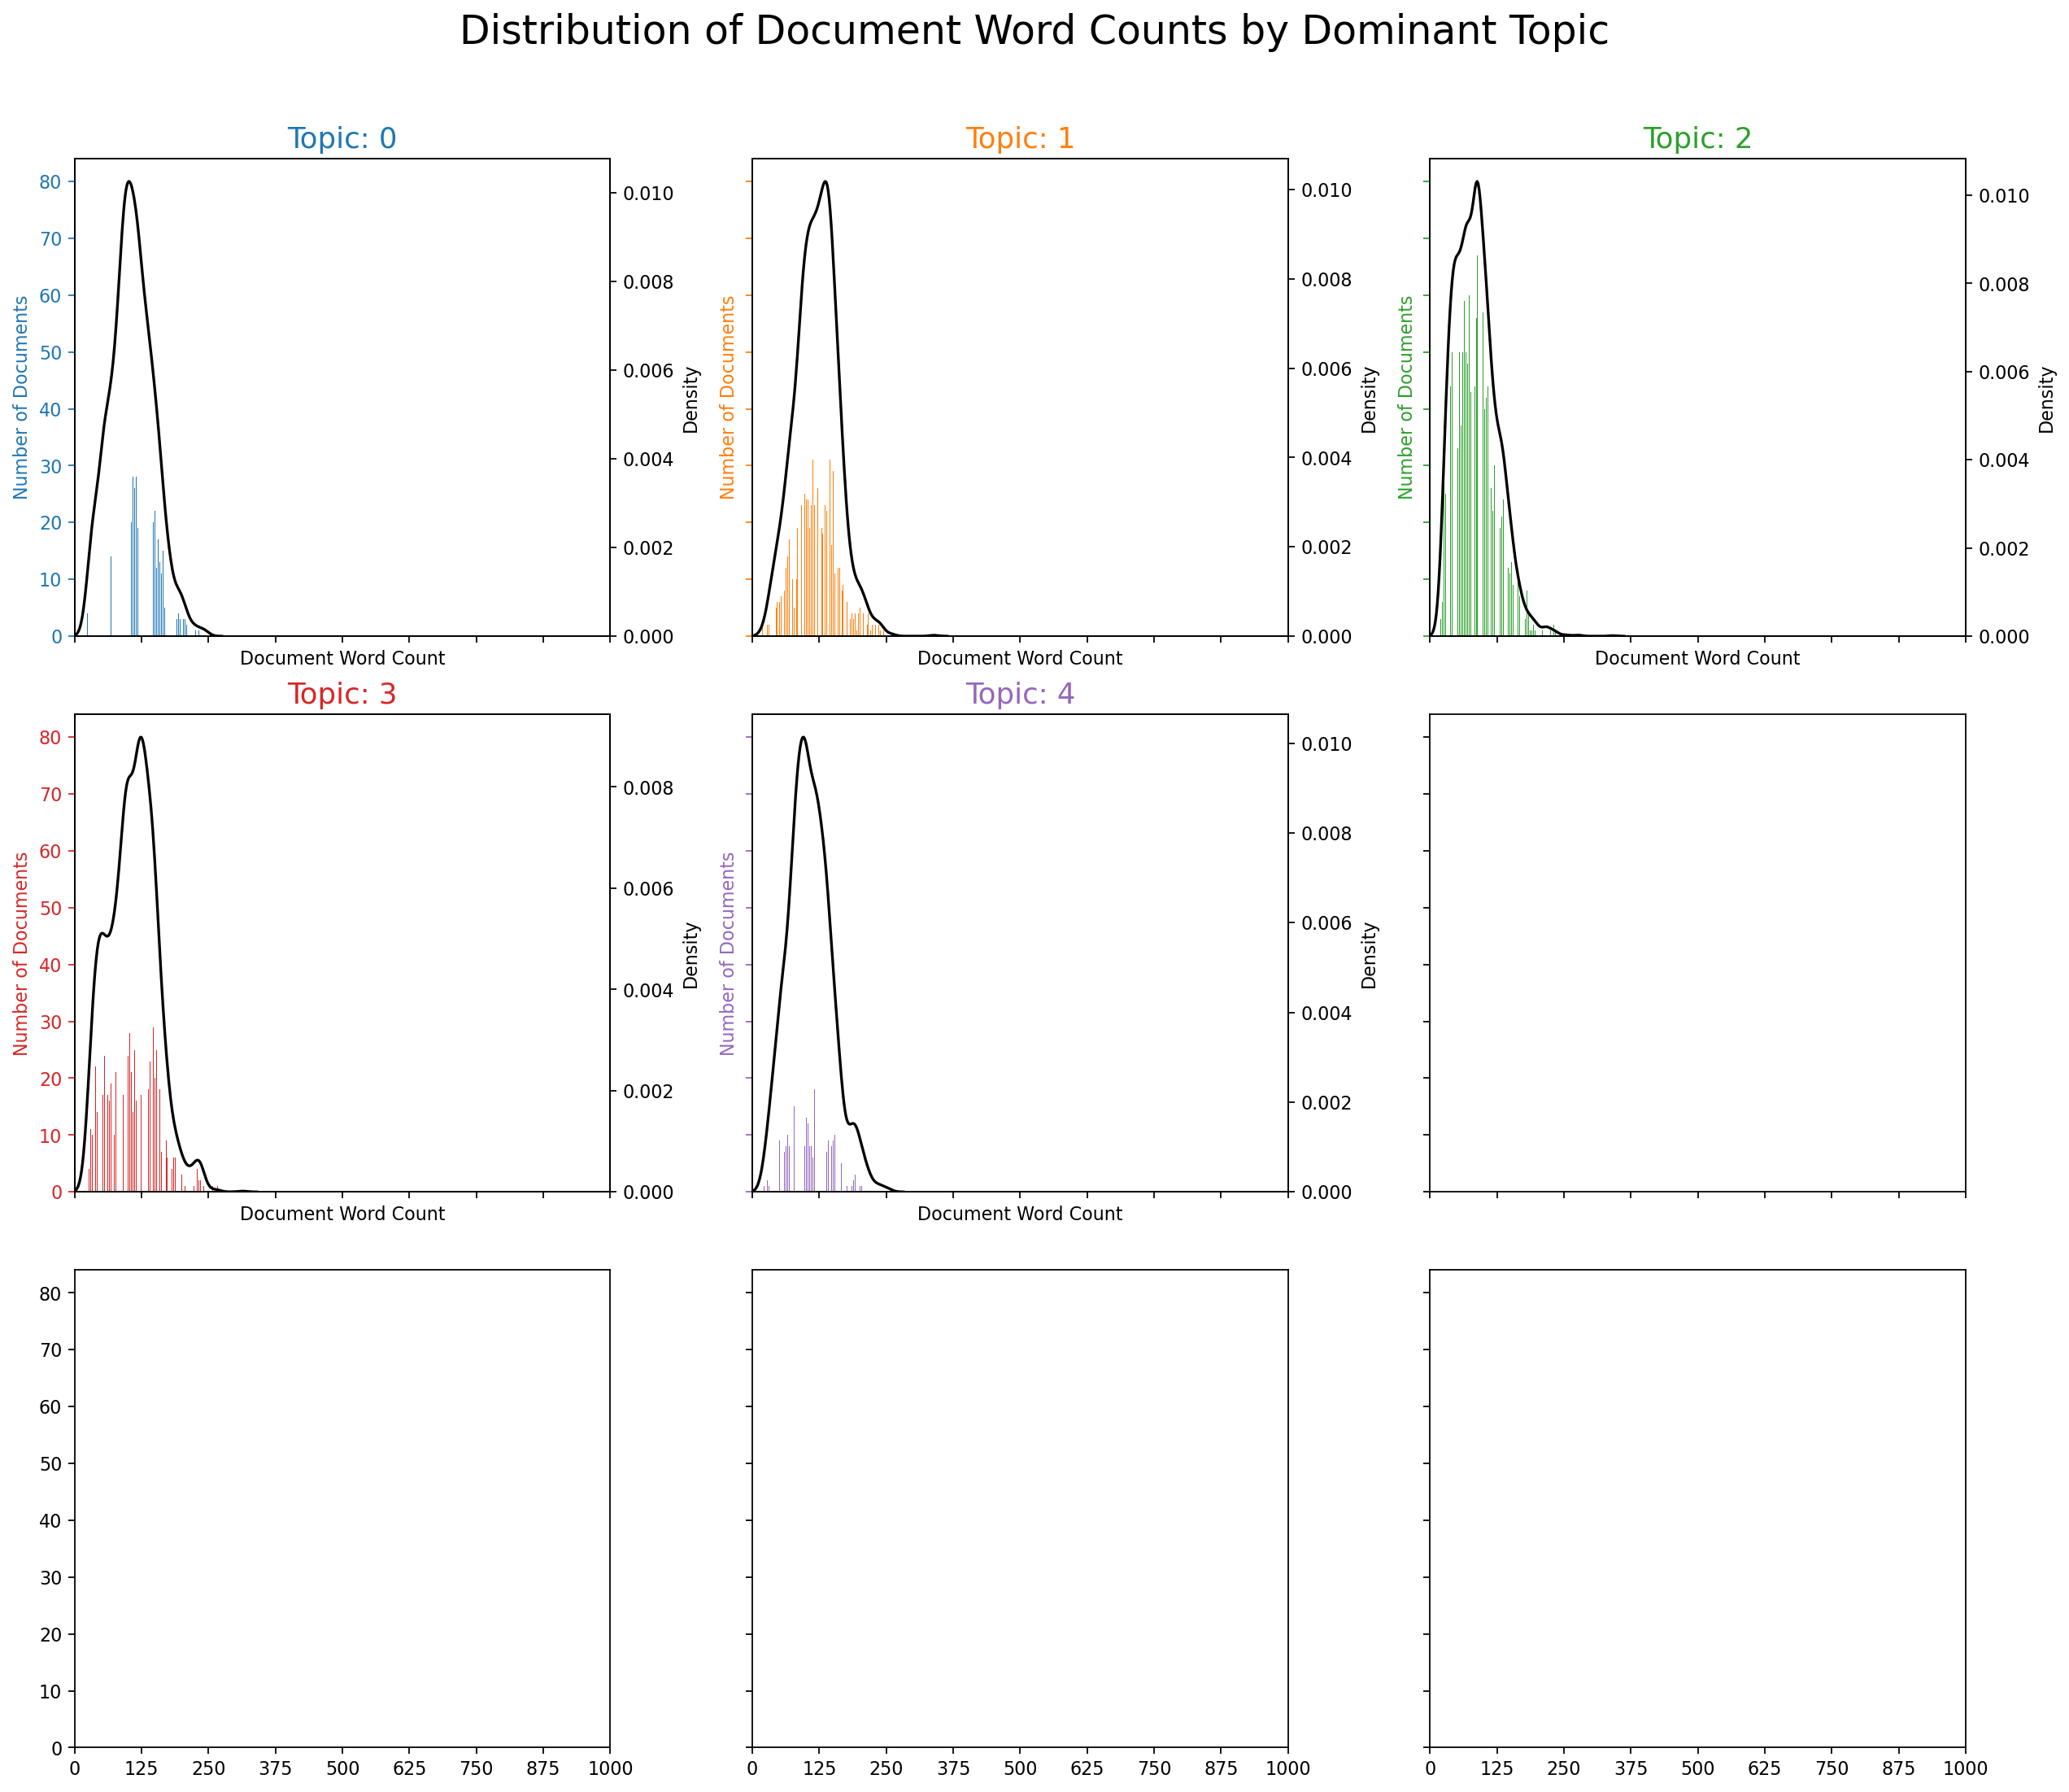

In [123]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(3,3,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    if(i <=4):
        df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
        doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
        ax.hist(doc_lens, bins = 1000, color=cols[i])
        ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
        sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
        ax.set(xlim=(0, 1000), xlabel='Document Word Count')
        ax.set_ylabel('Number of Documents', color=cols[i])
        ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

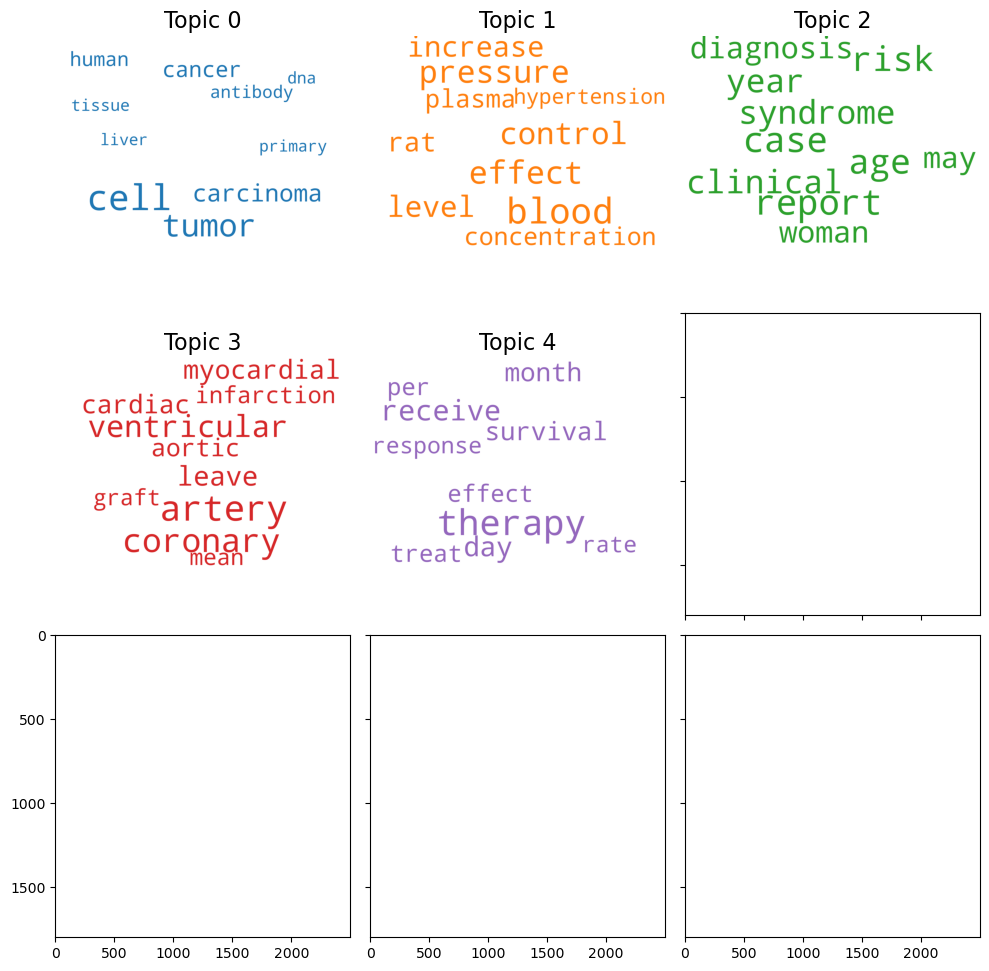

In [124]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    if(i<=4):
        fig.add_subplot(ax)
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
        plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

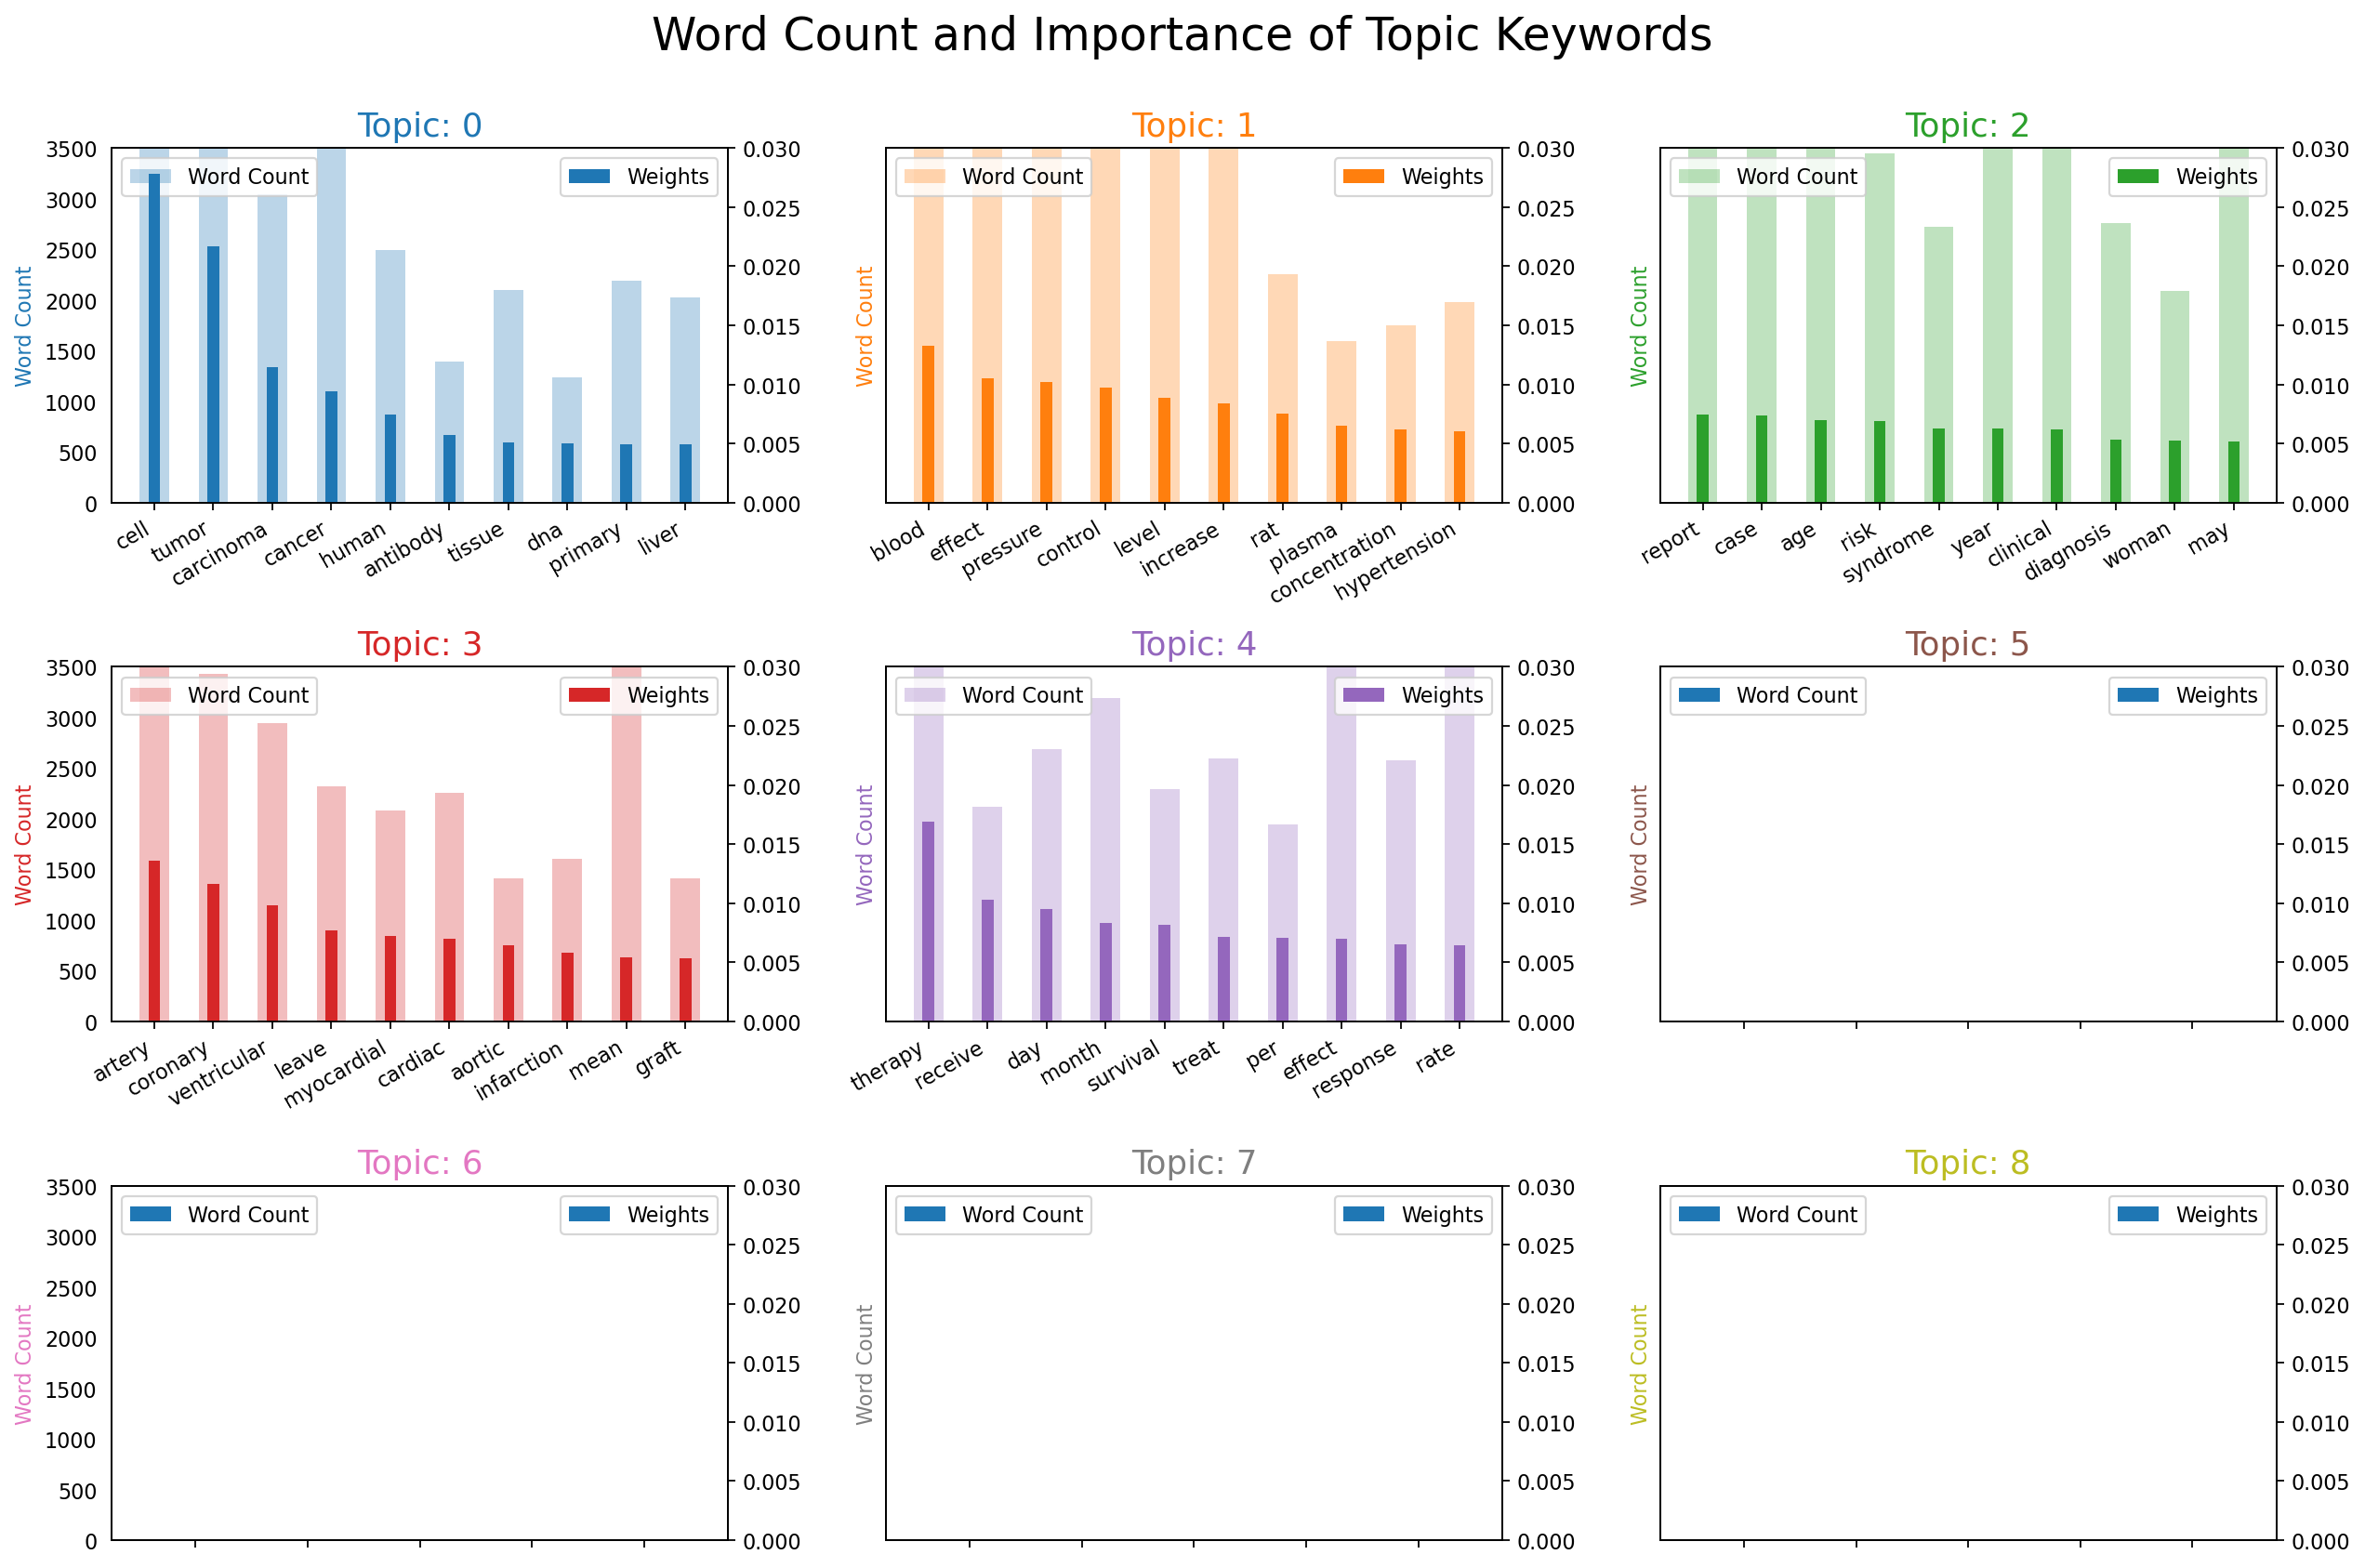

In [125]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in df['processed_text'] for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

dff = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 3, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=dff.loc[dff.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=dff.loc[dff.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(dff.loc[dff.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [126]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

topic_weights = []
for doc_topics in lda_model.get_document_topics(corpus):
    topic_weights.append([weight for topic_id, weight in doc_topics])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 14169 samples in 0.008s...
[t-SNE] Computed neighbors for 14169 samples in 0.205s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14169
[t-SNE] Computed conditional probabilities for sample 2000 / 14169
[t-SNE] Computed conditional probabilities for sample 3000 / 14169
[t-SNE] Computed conditional probabilities for sample 4000 / 14169
[t-SNE] Computed conditional probabilities for sample 5000 / 14169
[t-SNE] Computed conditional probabilities for sample 6000 / 14169
[t-SNE] Computed conditional probabilities for sample 7000 / 14169
[t-SNE] Computed conditional probabilities for sample 8000 / 14169
[t-SNE] Computed conditional probabilities for sample 9000 / 14169
[t-SNE] Computed conditional probabilities for sample 10000 / 14169
[t-SNE] Computed conditional probabilities for sample 11000 / 14169
[t-SNE] Computed conditional probabilities for sample 12000 / 14169
[t-SNE] Computed conditional probabilities for sam

In [127]:
# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 5
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics))
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

Loading BokehJS ...

In [128]:
assignedTopics = []
for document in corpus:
    assigned_topics = lda_model.get_document_topics(document)
    maxP = -1
    maxT = -1
    for topic, probability in assigned_topics:
        if(probability>maxP):
            maxP = probability
            maxT = topic
    assignedTopics.append(maxT)
    

In [129]:
# % of real labels in each topic
for topic in [0,1,2,3,4]:
    print("******* TOPIC " + str(topic))
    indices = [index for index, value in enumerate(assignedTopics) if value == topic]
    real_labels = [labels[i] for i in indices]
    # Get the frequency of elements using Counter
    frequency = Counter(real_labels)

    # Calculate relative frequencies
    total_elements = len(real_labels)
    relative_frequency = {key: value / total_elements for key, value in frequency.items()}

    print(relative_frequency)

******* TOPIC 0
{1: 0.5717415115005476, 2: 0.09784592917123038, 5: 0.2592186929536327, 4: 0.02154070828769624, 3: 0.04965315808689302}
******* TOPIC 1
{5: 0.2985938792390405, 4: 0.369313482216708, 2: 0.12861869313482216, 3: 0.14516129032258066, 1: 0.05831265508684864}
******* TOPIC 2
{2: 0.12813425468904244, 3: 0.21915103652517276, 1: 0.18124383020730503, 4: 0.10562685093780849, 5: 0.36584402764067125}
******* TOPIC 3
{3: 0.04443654461429079, 4: 0.5126199786704586, 5: 0.3441166014930679, 1: 0.05439033060789193, 2: 0.04443654461429079}
******* TOPIC 4
{2: 0.10049893086243764, 1: 0.27441197434069853, 5: 0.39344262295081966, 4: 0.08695652173913043, 3: 0.14468995010691377}


In [130]:
# % of real labels in each topic
for label in [1,2,3,4,5]:
    print("******* LABEL " + str(label))
    indices = [index for index, value in enumerate(labels) if value == label]
    assigned_topics = [assignedTopics[i] for i in indices]
    # Get the frequency of elements using Counter
    frequency = Counter(assigned_topics)

    # Calculate relative frequencies
    total_elements = len(assigned_topics)
    relative_frequency = {key: value / total_elements for key, value in frequency.items()}

    print(relative_frequency)

******* LABEL 1
{0: 0.4950995889977869, 2: 0.2902307935504268, 3: 0.04837179892507114, 4: 0.12171988618400253, 1: 0.044577932342712616}
******* LABEL 2
{2: 0.4344042838018742, 0: 0.17938420348058903, 1: 0.20816599732262384, 4: 0.09437751004016064, 3: 0.08366800535475234}
******* LABEL 3
{3: 0.06493506493506493, 2: 0.5766233766233766, 1: 0.18233766233766233, 4: 0.10545454545454545, 0: 0.07064935064935066}
******* LABEL 4
{3: 0.4726319239593576, 1: 0.29269092100950506, 2: 0.1753523434939364, 0: 0.01933792199278925, 4: 0.039986889544411666}
******* LABEL 5
{1: 0.1502601456815817, 3: 0.20145681581685743, 2: 0.38563995837669096, 0: 0.14776274713839752, 4: 0.11488033298647242}


In [131]:
df_labels

condition_label                   condition_name
0                1                        neoplasms
1                2        digestive system diseases
2                3          nervous system diseases
3                4          cardiovascular diseases
4                5  general pathological conditions

# Clustering ???

In [ ]:
df_train = pd.read_csv("./dataset/medical_tc_train_preprocessed.csv", index_col = 0)
df_test = pd.read_csv("./dataset/medical_tc_test_preprocessed.csv", index_col = 0)

In [ ]:
label_train = df_train.condition_label.values
label_test = df_test.condition_label.values

In [ ]:
labels = np.append(label_train, label_test)

In [ ]:
def analyseClusters(assignedLabels, df):
    

## TF-IDF and LSA

In [ ]:
df_train_vectorized = pd.read_csv("./dataset/medical_tc_train_vectorized_tfidf_lsa.csv", index_col = 0)
df_test_vectorized = pd.read_csv("./dataset/medical_tc_test_vectorized_tfidf_lsa.csv", index_col = 0)

In [ ]:
df_total = pd.concat([df_train_vectorized, df_test_vectorized], ignore_index = True)

In [ ]:
df_total.shape

In [ ]:
df_total

### KMeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import v_measure_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_score

In [ ]:
NUM_CLUSTERS = 5
km = KMeans(n_clusters=NUM_CLUSTERS, n_init=100, random_state=42).fit(df_total)
y_clus= km.predict(df_total)

In [ ]:
print(f'''V measure: {v_measure_score(y_clus, labels)}''')
print(f'''ARI: {adjusted_rand_score(y_clus,labels)}''')
print(f'''Sil.: {silhouette_score(df_total,y_clus)}''')

In [ ]:
unique_elements, element_counts = np.unique(y_clus, return_counts=True)

# Display the unique elements and their frequencies
for element, count in zip(unique_elements, element_counts):
    print(f"Element {element}: Frequency {count/km.labels_.shape[0]}")

In [ ]:
original_space_centroids = lsa.inverse_transform(km.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(NUM_CLUSTERS):
    print(f"Cluster {i}: ", end="")
    for ind in order_centroids[i, :10]:
        print(f"{terms[ind]} ", end="")
    print()

### Agglomerative clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

model.fit(df_total.to_numpy())
y_clus = model.labels_

In [ ]:
print(f'''V measure: {v_measure_score(y_clus, labels)}''')
print(f'''ARI: {adjusted_rand_score(y_clus,labels)}''')
print(f'''Sil.: {silhouette_score(df_total,y_clus)}''')

In [ ]:
unique_elements, element_counts = np.unique(y_clus, return_counts=True)

# Display the unique elements and their frequencies
for element, count in zip(unique_elements, element_counts):
    print(f"Element {element}: Frequency {count/model.labels_.shape[0]}")

## Word2Vec

In [ ]:
df_train_vectorized = pd.read_csv("./dataset/medical_tc_train_vectorized_w2vec.csv", index_col = 0)
df_test_vectorized = pd.read_csv("./dataset/medical_tc_test_vectorized_w2vec.csv", index_col = 0)

In [ ]:
df_total = pd.concat([pd.DataFrame(df_train_vectorized), pd.DataFrame(df_test_vectorized)], ignore_index = True)

### PCA 3D

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=3)
pca.fit(df_total) 
X_pca = pca.transform(df_total) 

Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cdict = {1:'red',2:'green', 3:"blue", 4:"yellow", 5:"purple"}
labl = {1:'neoplasms', 2:'digestive system diseases', 3:'nervous system diseases', 4:'cardiovascular diseases', 5:'general pathological conditions'}

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], label = labl[l], s=40)

ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

### KMeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import v_measure_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_score

In [ ]:
NUM_CLUSTERS = 5
km = KMeans(n_clusters=NUM_CLUSTERS, n_init=100, random_state=42).fit(df_total)
y_clus= km.predict(df_total)

In [ ]:
print(f'''V measure: {v_measure_score(y_clus, labels)}''')
print(f'''ARI: {adjusted_rand_score(y_clus,labels)}''')
print(f'''Sil.: {silhouette_score(df_total,y_clus)}''')

In [ ]:
unique_elements, element_counts = np.unique(y_clus, return_counts=True)

# Display the unique elements and their frequencies
for element, count in zip(unique_elements, element_counts):
    print(f"Element {element}: Frequency {count/clustering.labels_.shape[0]}")

### Agglomerative clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

model.fit(df_total.to_numpy())
y_clus = model.labels_

In [ ]:
print(f'''V measure: {v_measure_score(y_clus, labels)}''')
print(f'''ARI: {adjusted_rand_score(y_clus,labels)}''')
print(f'''Sil.: {silhouette_score(df_total,y_clus)}''')

In [ ]:
unique_elements, element_counts = np.unique(y_clus, return_counts=True)

# Display the unique elements and their frequencies
for element, count in zip(unique_elements, element_counts):
    print(f"Element {element}: Frequency {count/clustering.labels_.shape[0]}")

## BERTS

In [ ]:
df_train_vectorized = pd.read_csv("./dataset/medical_tc_train_vectorized_sbert.csv", index_col = 0)
df_test_vectorized = pd.read_csv("./dataset/medical_tc_test_vectorized_sbert.csv", index_col = 0)

In [ ]:
df_total = pd.concat([pd.DataFrame(df_train_vectorized), pd.DataFrame(df_test_vectorized)], ignore_index = True)

### PCA 3D

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=3)
pca.fit(df_total) 
X_pca = pca.transform(df_total) 

Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cdict = {1:'red',2:'green', 3:"blue", 4:"yellow", 5:"purple"}
labl = {1:'neoplasms', 2:'digestive system diseases', 3:'nervous system diseases', 4:'cardiovascular diseases', 5:'general pathological conditions'}

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], label = labl[l], s=40)

ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

### KMeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import v_measure_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_score

In [ ]:
NUM_CLUSTERS = 5
km = KMeans(n_clusters=NUM_CLUSTERS, n_init=100, random_state=42).fit(df_total)
y_clus= km.predict(df_total)

In [ ]:
print(f'''V measure: {v_measure_score(y_clus, labels)}''')
print(f'''ARI: {adjusted_rand_score(y_clus,labels)}''')
print(f'''Sil.: {silhouette_score(df_total,y_clus)}''')

In [ ]:
unique_elements, element_counts = np.unique(y_clus, return_counts=True)

# Display the unique elements and their frequencies
for element, count in zip(unique_elements, element_counts):
    print(f"Element {element}: Frequency {count/clustering.labels_.shape[0]}")

### Agglomerative clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

model.fit(df_total.to_numpy())
y_clus = model.labels_

In [ ]:
print(f'''V measure: {v_measure_score(y_clus, labels)}''')
print(f'''ARI: {adjusted_rand_score(y_clus,labels)}''')
print(f'''Sil.: {silhouette_score(df_total,y_clus)}''')

In [ ]:
unique_elements, element_counts = np.unique(y_clus, return_counts=True)

# Display the unique elements and their frequencies
for element, count in zip(unique_elements, element_counts):
    print(f"Element {element}: Frequency {count/clustering.labels_.shape[0]}")